# Vocabulary Size를 변경해서 시도해보기
----------------------------------------

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from tensorflow.keras.datasets import reuters

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print("fin")

fin


In [55]:
# 데이터 불러오기
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)

# 훈련과 시험 샘플 수 확인
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('시험 샘플의 수: {}'.format(len(x_test)))

# 정수 시퀀스 원래 뉴스 텍스트 데이터로 복원하기
word_index = reuters.get_word_index(path="reuters_word_index.json")

# 복원된 단어를 인덱스로 어떤 정수와 맵핑되는지 확인하기
print(word_index['the'])
print(word_index['it'])

# 실제 단어에 맵핑한 정수에 -3을 한 정수를 입력해서 각 정수에 +3하고 확인하기
index_to_word = {index + 3 : word for word, index in word_index.items()}
print(index_to_word[4]) # the
print(index_to_word[16]) # it

# index_to_word에 숫자 0은 , 숫자 1은 , 숫자 2는 를 넣어주기
for index, token in enumerate(("", "", "")):
    index_to_word[index]=token
    
# index_to_word로 첫번째 훈련용 기사 원래 텍스트로 복원하기
print(' '.join([index_to_word[index] for index in x_train[0]]))

decoded= []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded

decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded

# DTM, TF-IDF 행렬로 벡터화하기
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

훈련 샘플의 수: 8982
시험 샘플의 수: 2246
1
13
the
it
   said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
(8982, 9668)
(8982, 9668)


In [56]:
# 나이브 베이즈 분류기
print("[나이브 베이즈 분류기]")
mod = MultinomialNB()
mod.fit(tfidfv, y_train)

x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

predicted = mod.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("- 정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[나이브 베이즈 분류기의 Classification Report]")
print(classification_report(y_test, mod.predict(tfidfv_test)))

[나이브 베이즈 분류기]
- 정확도: 0.6589492430988424


[나이브 베이즈 분류기의 Classification Report]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.62      0.71      0.66       105
           2       0.00      0.00      0.00        20
           3       0.81      0.90      0.85       813
           4       0.52      0.96      0.67       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.08      0.15        25
          10       0.00      0.00      0.00        30
          11       0.62      0.64      0.63        83
          12       0.00      0.00      0.00        13
          13       1.00      0.03      0.05        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
  

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
# CNB
print("[CNB]")
cb = ComplementNB()
cb.fit(tfidfv, y_train)

predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[CNB의 Classification Report]")
print(classification_report(y_test, cb.predict(tfidfv_test)))

[CNB]
정확도: 0.773820124666073


[CNB의 Classification Report]
              precision    recall  f1-score   support

           0       0.78      0.58      0.67        12
           1       0.63      0.88      0.73       105
           2       0.91      0.50      0.65        20
           3       0.91      0.90      0.90       813
           4       0.77      0.92      0.84       474
           5       0.00      0.00      0.00         5
           6       0.93      0.93      0.93        14
           7       1.00      0.67      0.80         3
           8       0.50      0.13      0.21        38
           9       0.82      0.92      0.87        25
          10       0.96      0.80      0.87        30
          11       0.55      0.73      0.63        83
          12       0.00      0.00      0.00        13
          13       0.58      0.59      0.59        37
          14       0.00      0.00      0.00         2
          15       0.50      0.11      0.18         9
          16       0.

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
# 로지스틱 회귀
print("[로지스틱 회귀]")
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(tfidfv, y_train)

predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[로지스틱 회귀의 Classification Report]")
print(classification_report(y_test, lr.predict(tfidfv_test)))

[로지스틱 회귀]
정확도: 0.808993766696349


[로지스틱 회귀의 Classification Report]
              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.75      0.78      0.77       105
           2       0.71      0.75      0.73        20
           3       0.91      0.93      0.92       813
           4       0.80      0.87      0.84       474
           5       0.00      0.00      0.00         5
           6       0.92      0.86      0.89        14
           7       1.00      0.67      0.80         3
           8       0.66      0.71      0.68        38
           9       0.81      0.88      0.85        25
          10       0.93      0.87      0.90        30
          11       0.66      0.73      0.70        83
          12       0.57      0.31      0.40        13
          13       0.64      0.62      0.63        37
          14       0.67      1.00      0.80         2
          15       0.67      0.44      0.53         9
          16 

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with n

In [59]:
# 서포트 벡터 머신
print("[서포트 벡터 머신]")
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train)

predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[서포트 벡터 머신의 Classification Report]")
print(classification_report(y_test, lsvc.predict(tfidfv_test)))

[서포트 벡터 머신]
정확도: 0.7724844167408726


[서포트 벡터 머신의 Classification Report]
              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.69      0.71      0.70       105
           2       0.62      0.65      0.63        20
           3       0.91      0.92      0.91       813
           4       0.80      0.84      0.82       474
           5       0.00      0.00      0.00         5
           6       0.93      0.93      0.93        14
           7       1.00      0.67      0.80         3
           8       0.60      0.66      0.62        38
           9       0.80      0.80      0.80        25
          10       0.87      0.87      0.87        30
          11       0.65      0.67      0.66        83
          12       0.36      0.31      0.33        13
          13       0.59      0.54      0.56        37
          14       0.50      0.50      0.50         2
          15       0.71      0.56      0.63         9
        

/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [60]:
# 결정 트리
print("[결정 트리]")
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[결정 트리의 Classification Report]")
print(classification_report(y_test, tree.predict(tfidfv_test)))

[결정 트리]
정확도: 0.6215494211932324


[결정 트리의 Classification Report]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.73      0.42      0.53       105
           2       0.58      0.35      0.44        20
           3       0.93      0.84      0.88       813
           4       0.40      0.91      0.56       474
           5       0.00      0.00      0.00         5
           6       1.00      0.64      0.78        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.88      0.88      0.88        25
          10       0.86      0.80      0.83        30
          11       0.65      0.47      0.55        83
          12       0.17      0.08      0.11        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16    

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
# 랜덤 포레스트
print("[랜덤 포레스트]")
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[랜덤 포레스트의 Classification Report]")
print(classification_report(y_test, forest.predict(tfidfv_test)))

[랜덤 포레스트]
정확도: 0.6843276936776491


[랜덤 포레스트의 Classification Report]
              precision    recall  f1-score   support

           0       0.28      0.42      0.33        12
           1       0.43      0.78      0.56       105
           2       0.50      0.30      0.37        20
           3       0.84      0.90      0.87       813
           4       0.63      0.84      0.72       474
           5       0.00      0.00      0.00         5
           6       0.83      0.36      0.50        14
           7       1.00      0.33      0.50         3
           8       0.61      0.45      0.52        38
           9       0.62      0.40      0.49        25
          10       0.75      0.40      0.52        30
          11       0.52      0.55      0.53        83
          12       0.40      0.15      0.22        13
          13       0.43      0.24      0.31        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[그래디언트 부스팅 트리]
정확도: 0.7640249332146037


[그래디언트 부스팅 트리의 Classification Report]


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.77      0.67      0.71       105
           2       0.76      0.65      0.70        20
           3       0.88      0.91      0.90       813
           4       0.76      0.83      0.80       474
           5       0.00      0.00      0.00         5
           6       0.75      0.86      0.80        14
           7       0.50      0.33      0.40         3
           8       0.63      0.63      0.63        38
           9       0.79      0.76      0.78        25
          10       0.89      0.83      0.86        30
          11       0.64      0.67      0.66        83
          12       0.37      0.54      0.44        13
          13       0.57      0.46      0.51        37
          14       0.12      0.50      0.20         2
          15       0.29      0.22      0.25         9
          16       0.69      0.70      0.69        99
          17       0.29    

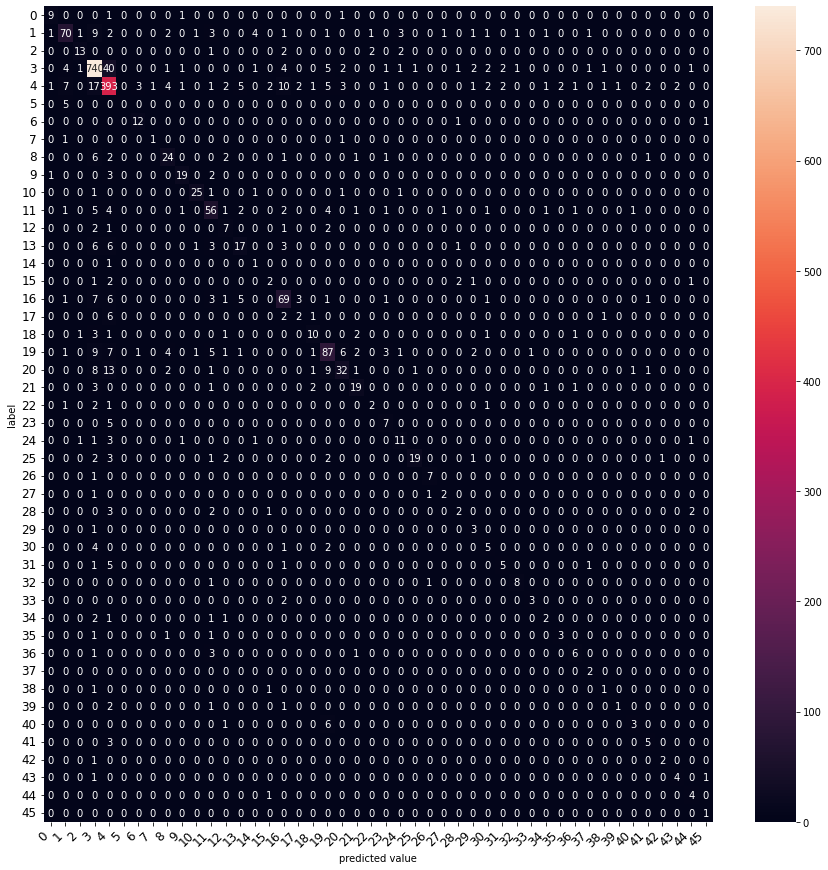

In [62]:
# 그래디언트 부스팅 트리
print("[그래디언트 부스팅 트리]")
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)

predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[그래디언트 부스팅 트리의 Classification Report]")
print(classification_report(y_test, grbt.predict(tfidfv_test)))
print("\n")
print("[그래디언트 부스팅 트리의 Confusion Matrix]")
graph_confusion_matrix(grbt, tfidfv_test, y_test)

In [63]:
# 보팅
print("[보팅]")
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)

predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[보팅의 Classification Report]")
print(classification_report(y_test, voting_classifier.predict(tfidfv_test)))

[보팅]


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


정확도: 0.808993766696349


[보팅의 Classification Report]
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.79      0.71      0.75       105
           2       0.73      0.80      0.76        20
           3       0.92      0.93      0.93       813
           4       0.81      0.88      0.84       474
           5       0.00      0.00      0.00         5
           6       0.92      0.86      0.89        14
           7       1.00      0.67      0.80         3
           8       0.72      0.68      0.70        38
           9       0.81      0.84      0.82        25
          10       0.93      0.90      0.92        30
          11       0.65      0.67      0.66        83
          12       0.43      0.46      0.44        13
          13       0.66      0.62      0.64        37
          14       0.25      1.00      0.40         2
          15       0.57      0.44      0.50         9
          16       0.71     

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 1. 모든 단어 사용

In [64]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

print('훈련 샘플의 수: {}'.format(len(x_train)))
print('시험 샘플의 수: {}'.format(len(x_test)))

word_index = reuters.get_word_index(path="reuters_word_index.json")

print(word_index['the'])
print(word_index['it'])

index_to_word = {index + 3 : word for word, index in word_index.items()}
print(index_to_word[4]) # the
print(index_to_word[16]) # it

for index, token in enumerate(("", "", "")):
    index_to_word[index]=token

print(' '.join([index_to_word[index] for index in x_train[0]]))

decoded= []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded

decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded

dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

훈련 샘플의 수: 8982
시험 샘플의 수: 2246
1
13
the
it
 mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
(8982, 26504)
(8982, 26504)


In [65]:
def graph_confusion_matrix(model, x_test, y_test):#, classes_name):
    df_cm = pd.DataFrame(confusion_matrix(y_test, model.predict(x_test)))#, index=classes_name, columns=classes_name)
    fig = plt.figure(figsize=(15,15))
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
    plt.ylabel('label')
    plt.xlabel('predicted value')
print("fin")

fin


[나이브 베이즈 분류기]
- 정확도: 0.5997328584149599


[나이브 베이즈 분류기의 Classification Report]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.79      0.21      0.33       105
           2       0.00      0.00      0.00        20
           3       0.72      0.92      0.81       813
           4       0.45      0.96      0.61       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00        25
          10       0.00      0.00      0.00        30
          11       0.80      0.29      0.42        83
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
  

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


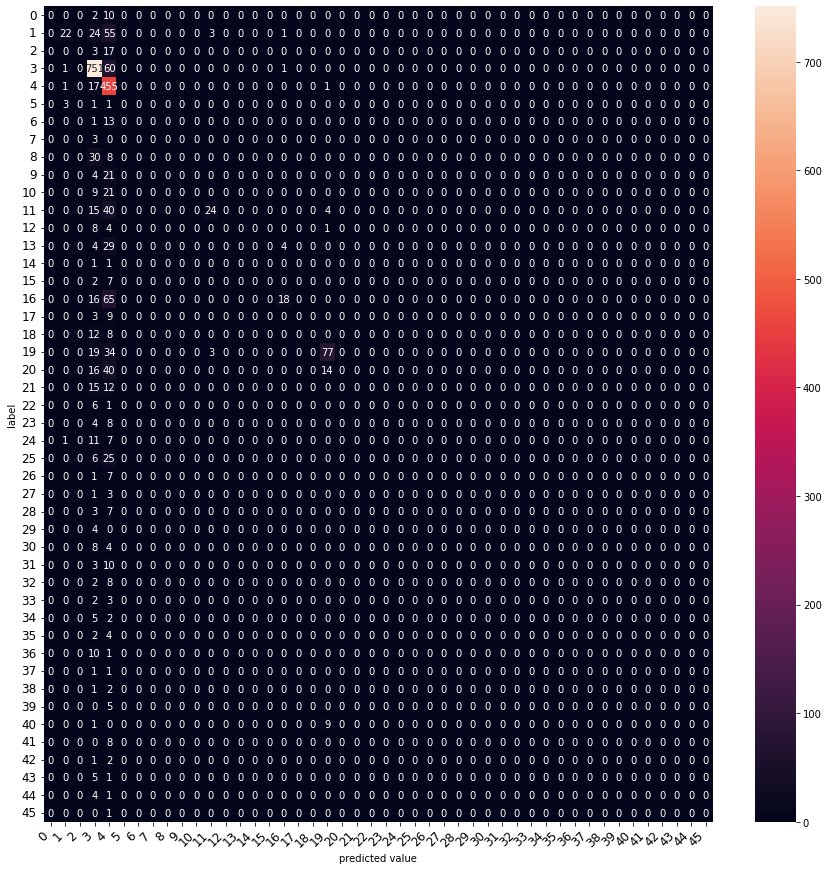

In [66]:
# 나이브 베이즈 분류기
print("[나이브 베이즈 분류기]")
mod = MultinomialNB()
mod.fit(tfidfv, y_train)

x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

predicted = mod.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("- 정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[나이브 베이즈 분류기의 Classification Report]")
print(classification_report(y_test, mod.predict(tfidfv_test)))
print("\n")      
print("[나이브 베이즈 분류기의 Confusion Matrix]")
graph_confusion_matrix(mod, tfidfv_test, y_test)     

[CNB]
정확도: 0.7649154051647373


[CNB의 Classification Report]
              precision    recall  f1-score   support

           0       0.75      0.50      0.60        12
           1       0.63      0.88      0.73       105
           2       0.91      0.50      0.65        20
           3       0.87      0.91      0.89       813
           4       0.75      0.93      0.83       474
           5       0.00      0.00      0.00         5
           6       0.92      0.86      0.89        14
           7       1.00      0.67      0.80         3
           8       0.43      0.08      0.13        38
           9       0.81      0.88      0.85        25
          10       0.96      0.73      0.83        30
          11       0.55      0.67      0.61        83
          12       0.00      0.00      0.00        13
          13       0.62      0.54      0.58        37
          14       0.00      0.00      0.00         2
          15       0.50      0.11      0.18         9
          16       0

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


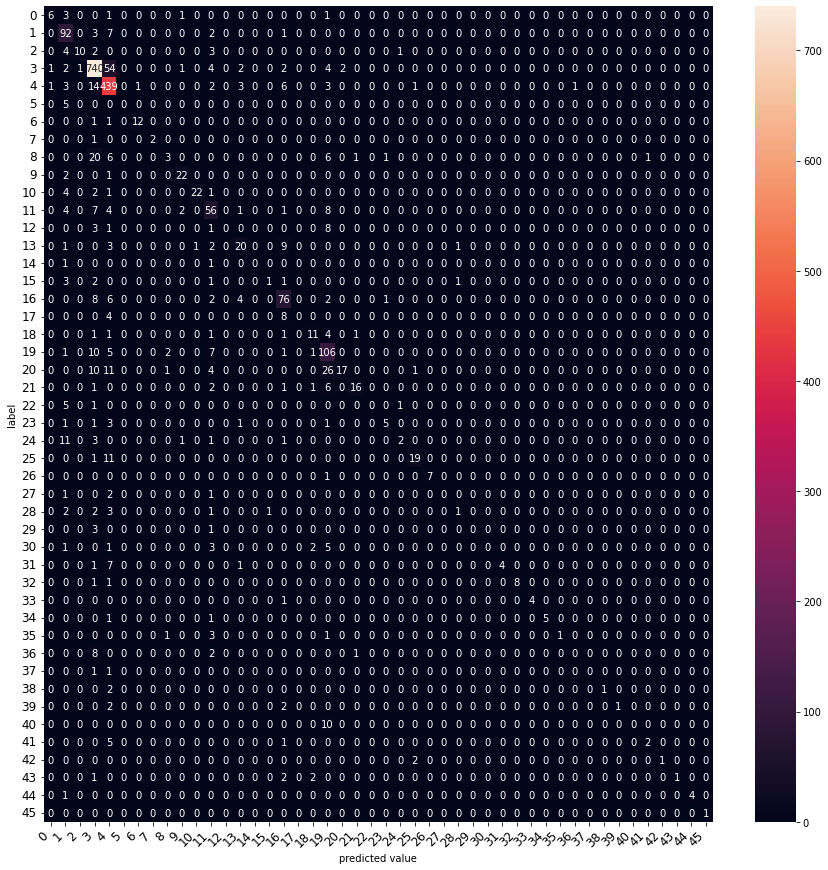

In [67]:
# CNB
print("[CNB]")
cb = ComplementNB()
cb.fit(tfidfv, y_train)

predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[CNB의 Classification Report]")
print(classification_report(y_test, cb.predict(tfidfv_test)))
print("\n")
print("[CNB의 Confusion Matrix]")
graph_confusion_matrix(cb, tfidfv_test, y_test)

[로지스틱 회귀]


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with n

정확도: 0.8125556544968834


[로지스틱 회귀의 Classification Report]
              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.74      0.80      0.77       105
           2       0.70      0.70      0.70        20
           3       0.93      0.93      0.93       813
           4       0.81      0.87      0.84       474
           5       1.00      0.20      0.33         5
           6       0.93      1.00      0.97        14
           7       1.00      0.67      0.80         3
           8       0.68      0.74      0.71        38
           9       0.82      0.92      0.87        25
          10       0.93      0.87      0.90        30
          11       0.65      0.73      0.69        83
          12       0.57      0.31      0.40        13
          13       0.64      0.62      0.63        37
          14       0.67      1.00      0.80         2
          15       0.71      0.56      0.63         9
          16       0.7

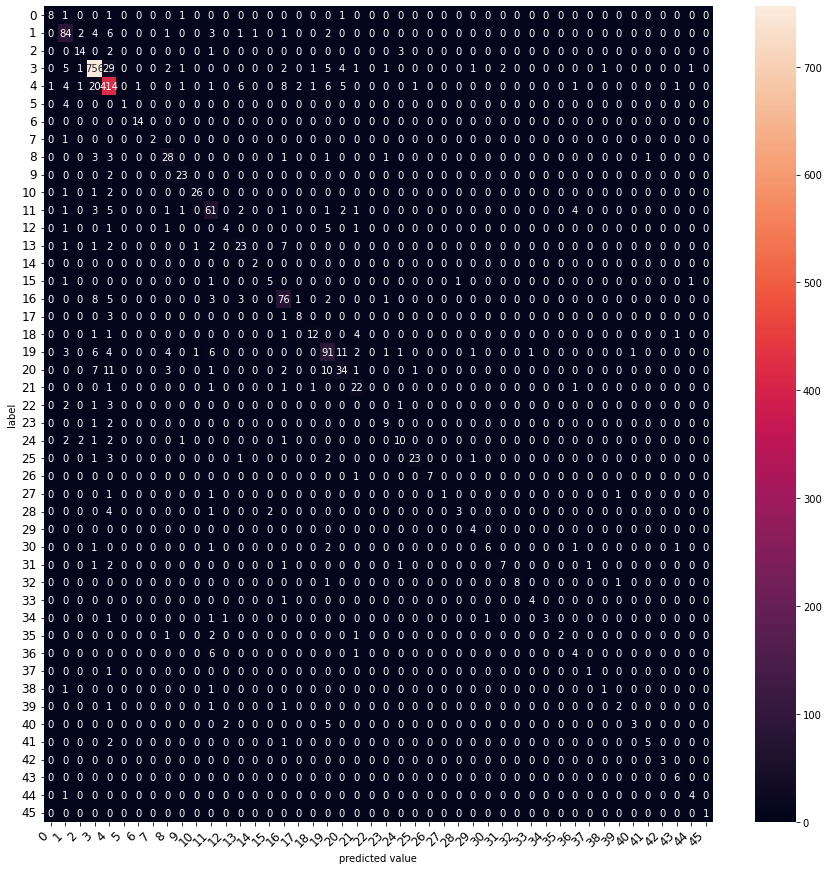

In [68]:
# 로지스틱 회귀
print("[로지스틱 회귀]")
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(tfidfv, y_train)

predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[로지스틱 회귀의 Classification Report]")
print(classification_report(y_test, lr.predict(tfidfv_test)))
print("\n")
print("[로지스틱 회귀의 Confusion Matrix]")
graph_confusion_matrix(lr, tfidfv_test, y_test)

[서포트 벡터 머신]


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_

정확도: 0.7769367764915405


[서포트 벡터 머신의 Classification Report]
              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.67      0.74      0.70       105
           2       0.75      0.60      0.67        20
           3       0.91      0.91      0.91       813
           4       0.80      0.85      0.83       474
           5       0.25      0.20      0.22         5
           6       0.76      0.93      0.84        14
           7       1.00      0.33      0.50         3
           8       0.70      0.68      0.69        38
           9       0.91      0.84      0.87        25
          10       0.92      0.77      0.84        30
          11       0.60      0.73      0.66        83
          12       0.43      0.23      0.30        13
          13       0.57      0.54      0.56        37
          14       1.00      0.50      0.67         2
          15       0.75      0.33      0.46         9
          16       0

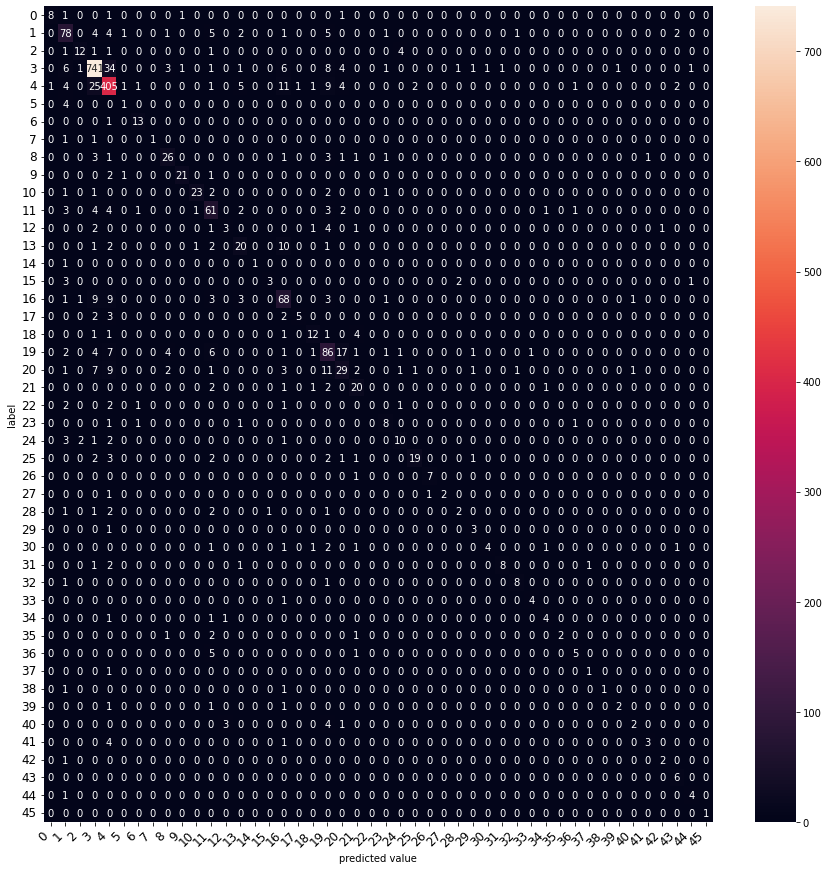

In [69]:
# 서포트 벡터 머신
print("[서포트 벡터 머신]")
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train)

predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[서포트 벡터 머신의 Classification Report]")
print(classification_report(y_test, lsvc.predict(tfidfv_test)))
print("\n")
print("[서포트 벡터 머신의 Confusion Matrix]")
graph_confusion_matrix(lsvc, tfidfv_test, y_test)

[결정 트리]
정확도: 0.6219946571682992


[결정 트리의 Classification Report]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.69      0.42      0.52       105
           2       0.71      0.50      0.59        20
           3       0.93      0.85      0.89       813
           4       0.40      0.89      0.55       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.12      0.21        25
          10       0.89      0.80      0.84        30
          11       0.60      0.60      0.60        83
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16    

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


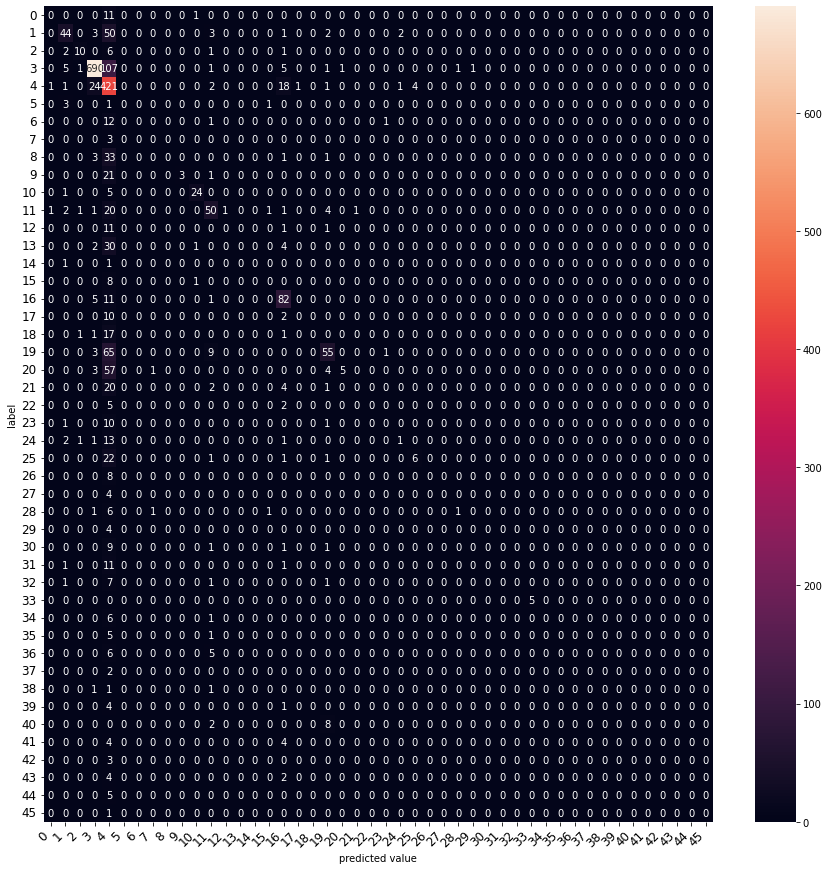

In [70]:
# 결정 트리
print("[결정 트리]")
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[결정 트리의 Classification Report]")
print(classification_report(y_test, tree.predict(tfidfv_test)))
print("\n")
print("[결정 트리의 Confusion Matrix]")
graph_confusion_matrix(tree, tfidfv_test, y_test)

[랜덤 포레스트]
정확도: 0.6607301869991096


[랜덤 포레스트의 Classification Report]
              precision    recall  f1-score   support

           0       0.29      0.50      0.36        12
           1       0.35      0.67      0.46       105
           2       0.17      0.10      0.12        20
           3       0.82      0.89      0.86       813
           4       0.64      0.85      0.73       474
           5       0.00      0.00      0.00         5
           6       1.00      0.29      0.44        14
           7       1.00      0.33      0.50         3
           8       0.61      0.53      0.56        38
           9       0.50      0.32      0.39        25
          10       0.56      0.17      0.26        30
          11       0.48      0.52      0.50        83
          12       0.29      0.15      0.20        13
          13       0.25      0.16      0.20        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


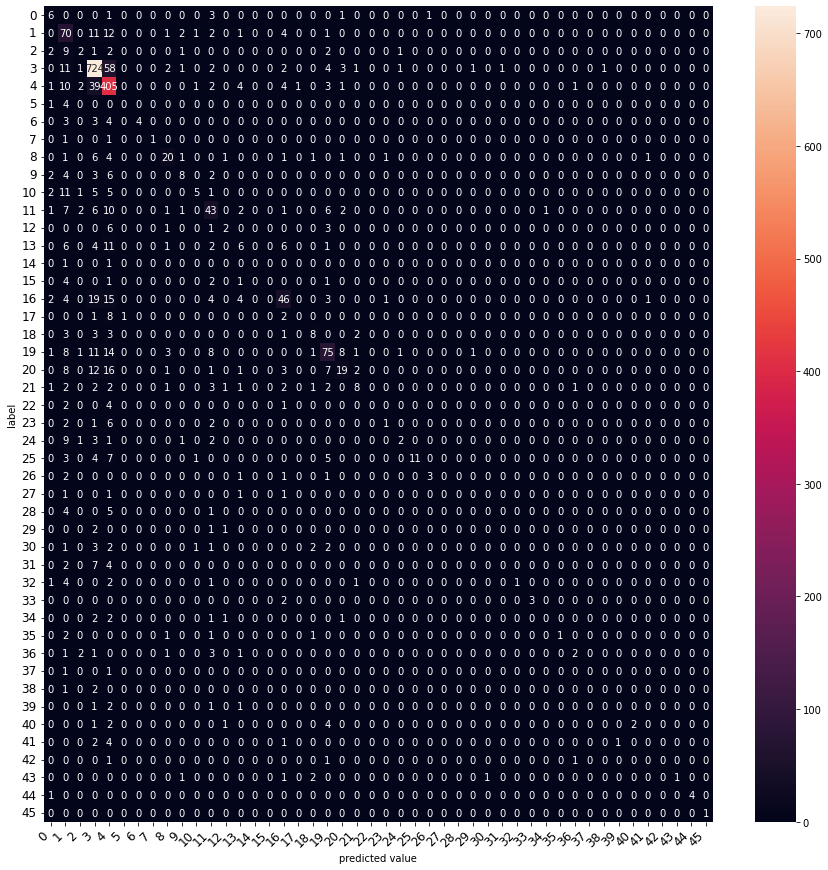

In [71]:
# 랜덤 포레스트
print("[랜덤 포레스트]")
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[랜덤 포레스트의 Classification Report]")
print(classification_report(y_test, forest.predict(tfidfv_test)))
print("\n")
print("[랜덤 포레스트의 Confusion Matrix]")
graph_confusion_matrix(forest, tfidfv_test, y_test)

[그래디언트 부스팅 트리]
정확도: 0.769813000890472


[그래디언트 부스팅 트리의 Classification Report]
              precision    recall  f1-score   support

           0       0.67      0.67      0.67        12
           1       0.75      0.71      0.73       105
           2       0.59      0.80      0.68        20
           3       0.88      0.90      0.89       813
           4       0.78      0.84      0.81       474
           5       1.00      0.20      0.33         5
           6       0.83      0.71      0.77        14
           7       1.00      0.33      0.50         3
           8       0.65      0.63      0.64        38
           9       0.90      0.76      0.83        25
          10       0.71      0.80      0.75        30
          11       0.65      0.65      0.65        83
          12       0.40      0.46      0.43        13
          13       0.58      0.49      0.53        37
          14       0.20      0.50      0.29         2
          15       0.25      0.11      0.15         9
   

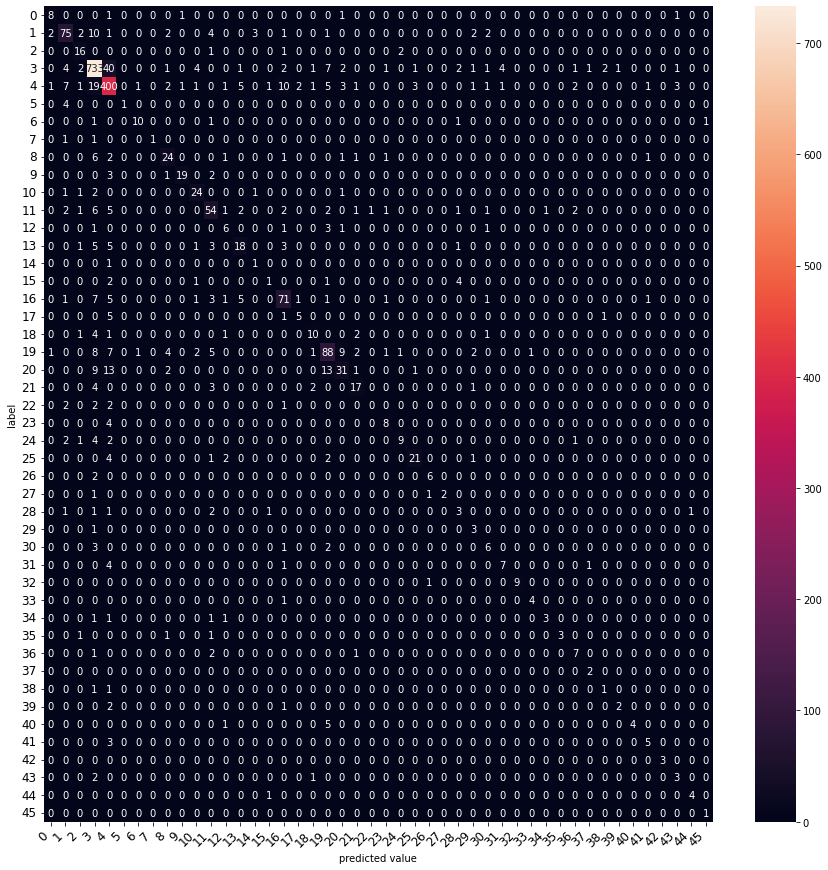

In [72]:
# 그래디언트 부스팅 트리
print("[그래디언트 부스팅 트리]")
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)

predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[그래디언트 부스팅 트리의 Classification Report]")
print(classification_report(y_test, grbt.predict(tfidfv_test)))
print("\n")
print("[그래디언트 부스팅 트리의 Confusion Matrix]")
graph_confusion_matrix(grbt, tfidfv_test, y_test)

[보팅]


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


정확도: 0.8192341941228851


[보팅의 Classification Report]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.78      0.77      0.78       105
           2       0.64      0.80      0.71        20
           3       0.93      0.93      0.93       813
           4       0.82      0.88      0.85       474
           5       1.00      0.20      0.33         5
           6       0.86      0.86      0.86        14
           7       1.00      0.67      0.80         3
           8       0.73      0.71      0.72        38
           9       0.80      0.80      0.80        25
          10       0.90      0.90      0.90        30
          11       0.68      0.72      0.70        83
          12       0.50      0.46      0.48        13
          13       0.69      0.65      0.67        37
          14       0.33      1.00      0.50         2
          15       0.40      0.22      0.29         9
          16       0.75    

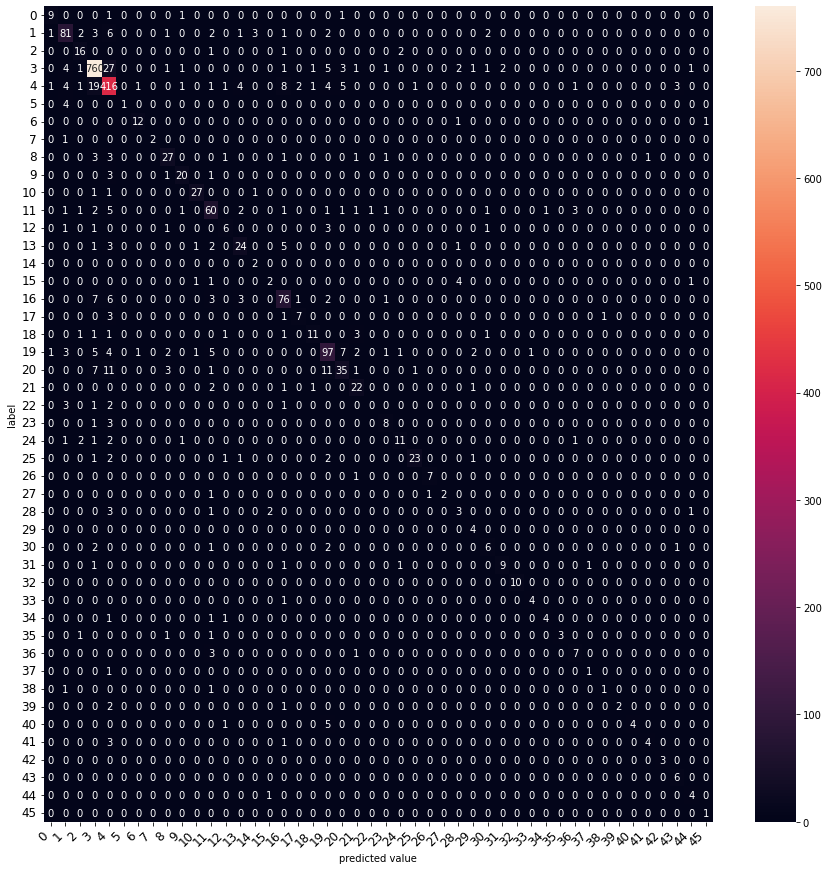

In [73]:
# 보팅
print("[보팅]")
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)

predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[보팅의 Classification Report]")
print(classification_report(y_test, voting_classifier.predict(tfidfv_test)))
print("\n")
print("[보팅의 Confusion Matrix]")
graph_confusion_matrix(voting_classifier, tfidfv_test, y_test)

## 2. 빈도수 상위 5,000개의 단어만 사용

In [74]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2) # 단어 5천개로 한정

print('훈련 샘플의 수: {}'.format(len(x_train)))
print('시험 샘플의 수: {}'.format(len(x_test)))

word_index = reuters.get_word_index(path="reuters_word_index.json")

print(word_index['the'])
print(word_index['it'])

index_to_word = {index + 3 : word for word, index in word_index.items()}
print(index_to_word[4]) # the
print(index_to_word[16]) # it

for index, token in enumerate(("", "", "")):
    index_to_word[index]=token

print(' '.join([index_to_word[index] for index in x_train[0]]))

decoded= []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded

decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded

dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

훈련 샘플의 수: 8982
시험 샘플의 수: 2246
1
13
the
it
   said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
(8982, 4865)
(8982, 4865)


[나이브 베이즈 분류기]
- 정확도: 0.6780943900267141


[나이브 베이즈 분류기의 Classification Report]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.50      0.81      0.62       105
           2       0.00      0.00      0.00        20
           3       0.85      0.89      0.87       813
           4       0.61      0.95      0.74       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.32      0.48        25
          10       0.00      0.00      0.00        30
          11       0.48      0.75      0.58        83
          12       0.00      0.00      0.00        13
          13       1.00      0.16      0.28        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
  

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


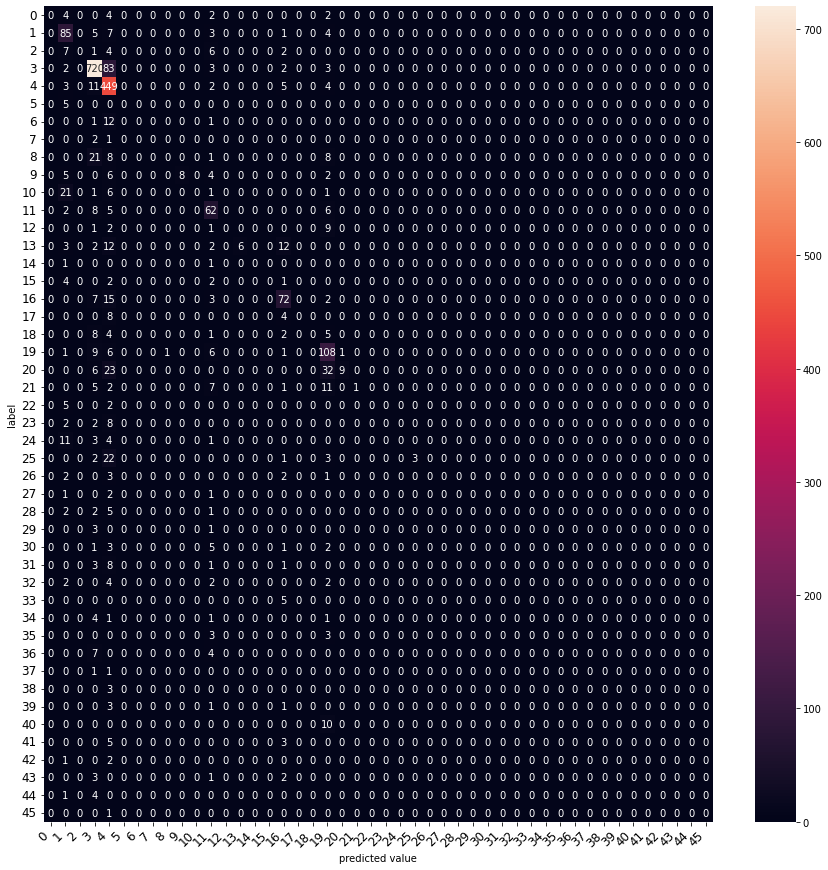

In [75]:
# 나이브 베이즈 분류기
print("[나이브 베이즈 분류기]")
mod = MultinomialNB()
mod.fit(tfidfv, y_train)

x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

predicted = mod.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("- 정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[나이브 베이즈 분류기의 Classification Report]")
print(classification_report(y_test, mod.predict(tfidfv_test)))
print("\n")      
print("[나이브 베이즈 분류기의 Confusion Matrix]")
graph_confusion_matrix(mod, tfidfv_test, y_test)

[CNB]
정확도: 0.773820124666073


[CNB의 Classification Report]
              precision    recall  f1-score   support

           0       0.78      0.58      0.67        12
           1       0.63      0.86      0.73       105
           2       0.91      0.50      0.65        20
           3       0.91      0.89      0.90       813
           4       0.75      0.92      0.83       474
           5       0.00      0.00      0.00         5
           6       0.86      0.86      0.86        14
           7       1.00      0.67      0.80         3
           8       0.57      0.21      0.31        38
           9       0.82      0.92      0.87        25
          10       0.96      0.80      0.87        30
          11       0.55      0.77      0.64        83
          12       0.00      0.00      0.00        13
          13       0.69      0.59      0.64        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


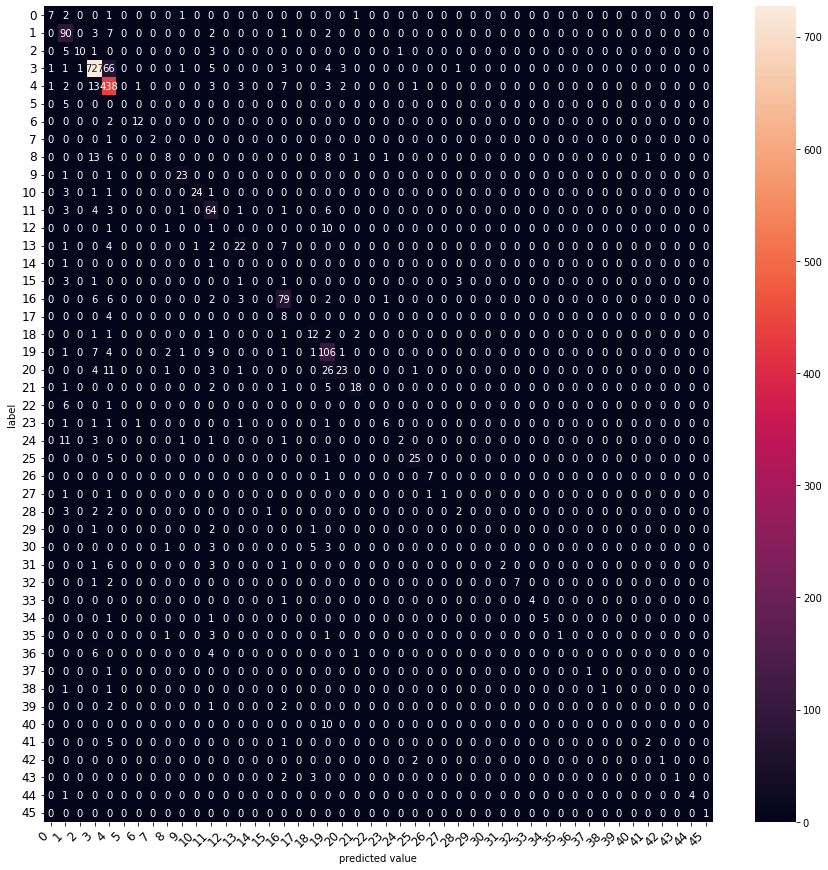

In [76]:
# CNB
print("[CNB]")
cb = ComplementNB()
cb.fit(tfidfv, y_train)

predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[CNB의 Classification Report]")
print(classification_report(y_test, cb.predict(tfidfv_test)))
print("\n")
print("[CNB의 Confusion Matrix]")
graph_confusion_matrix(cb, tfidfv_test, y_test)

[로지스틱 회귀]


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with n

정확도: 0.8063223508459484


[로지스틱 회귀의 Classification Report]
              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.79      0.81      0.80       105
           2       0.73      0.80      0.76        20
           3       0.91      0.93      0.92       813
           4       0.80      0.87      0.83       474
           5       0.00      0.00      0.00         5
           6       0.92      0.86      0.89        14
           7       1.00      0.33      0.50         3
           8       0.66      0.71      0.68        38
           9       0.81      0.88      0.85        25
          10       0.93      0.87      0.90        30
          11       0.63      0.73      0.68        83
          12       0.57      0.31      0.40        13
          13       0.64      0.62      0.63        37
          14       0.67      1.00      0.80         2
          15       0.83      0.56      0.67         9
          16       0.7

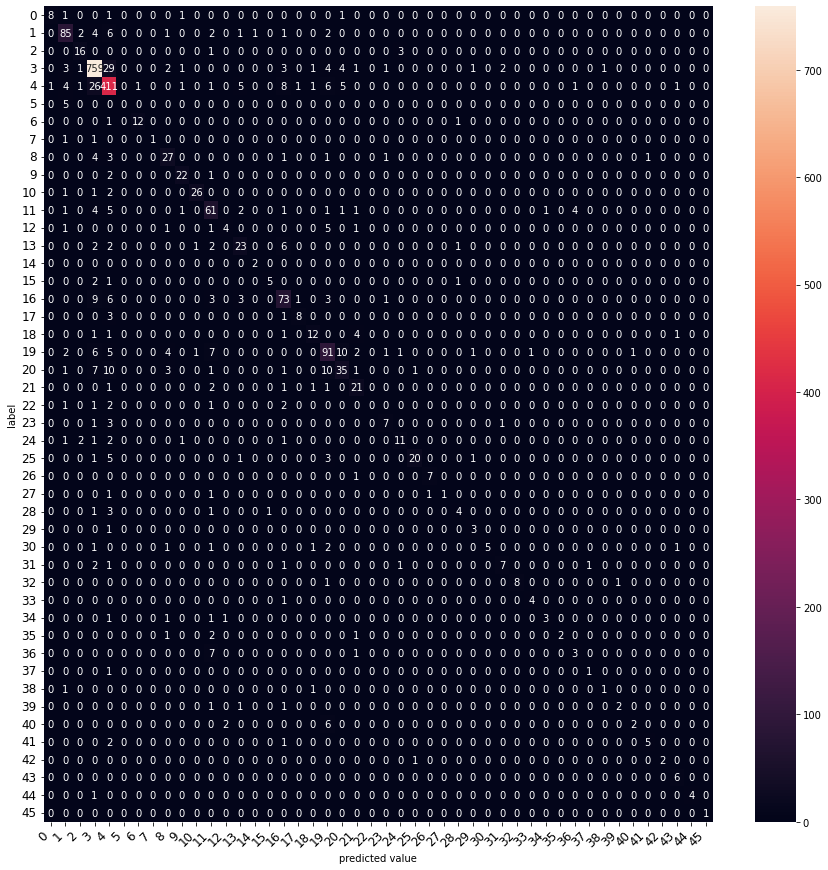

In [77]:
# 로지스틱 회귀
print("[로지스틱 회귀]")
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(tfidfv, y_train)

predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[로지스틱 회귀의 Classification Report]")
print(classification_report(y_test, lr.predict(tfidfv_test)))
print("\n")
print("[로지스틱 회귀의 Confusion Matrix]")
graph_confusion_matrix(lr, tfidfv_test, y_test)

[서포트 벡터 머신]


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


정확도: 0.7658058771148709


[서포트 벡터 머신의 Classification Report]
              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.71      0.72      0.72       105
           2       0.79      0.75      0.77        20
           3       0.90      0.89      0.90       813
           4       0.82      0.84      0.83       474
           5       0.00      0.00      0.00         5
           6       0.76      0.93      0.84        14
           7       1.00      0.33      0.50         3
           8       0.62      0.63      0.62        38
           9       0.78      0.84      0.81        25
          10       0.81      0.83      0.82        30
          11       0.62      0.72      0.67        83
          12       0.50      0.38      0.43        13
          13       0.62      0.65      0.63        37
          14       0.33      0.50      0.40         2
          15       0.75      0.33      0.46         9
          16       0

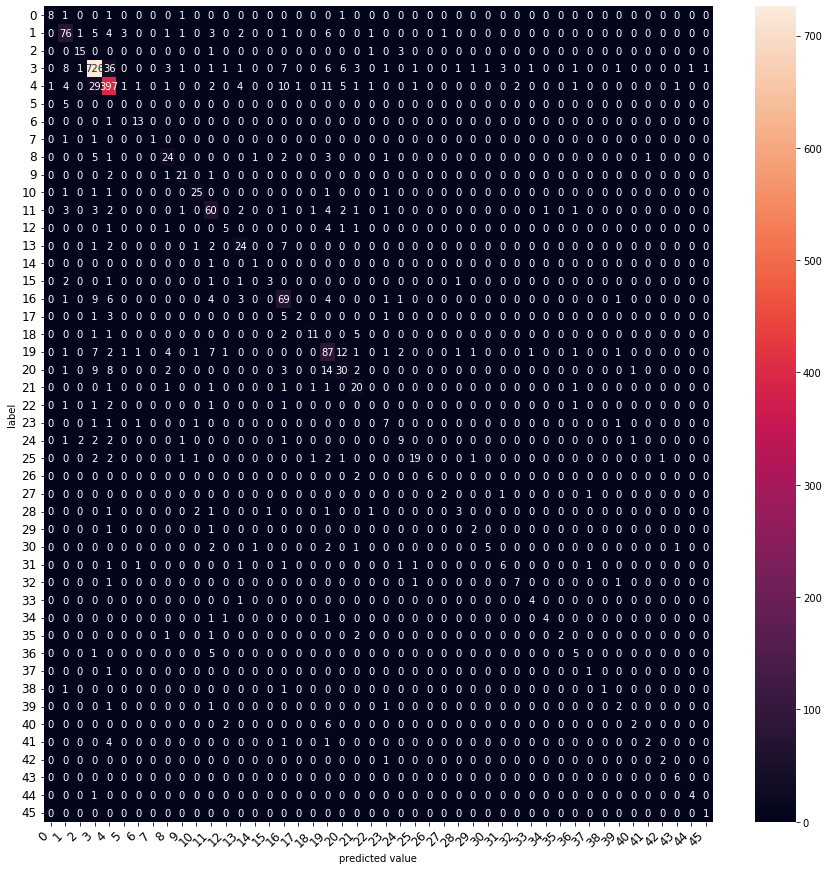

In [78]:
# 서포트 벡터 머신
print("[서포트 벡터 머신]")
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train)

predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[서포트 벡터 머신의 Classification Report]")
print(classification_report(y_test, lsvc.predict(tfidfv_test)))
print("\n")
print("[서포트 벡터 머신의 Confusion Matrix]")
graph_confusion_matrix(lsvc, tfidfv_test, y_test)

[결정 트리]
정확도: 0.6170970614425646


[결정 트리의 Classification Report]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.76      0.40      0.53       105
           2       0.62      0.50      0.56        20
           3       0.92      0.85      0.88       813
           4       0.39      0.88      0.54       474
           5       0.00      0.00      0.00         5
           6       1.00      0.57      0.73        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.88      0.88      0.88        25
          10       0.87      0.87      0.87        30
          11       0.64      0.47      0.54        83
          12       1.00      0.08      0.14        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16    

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


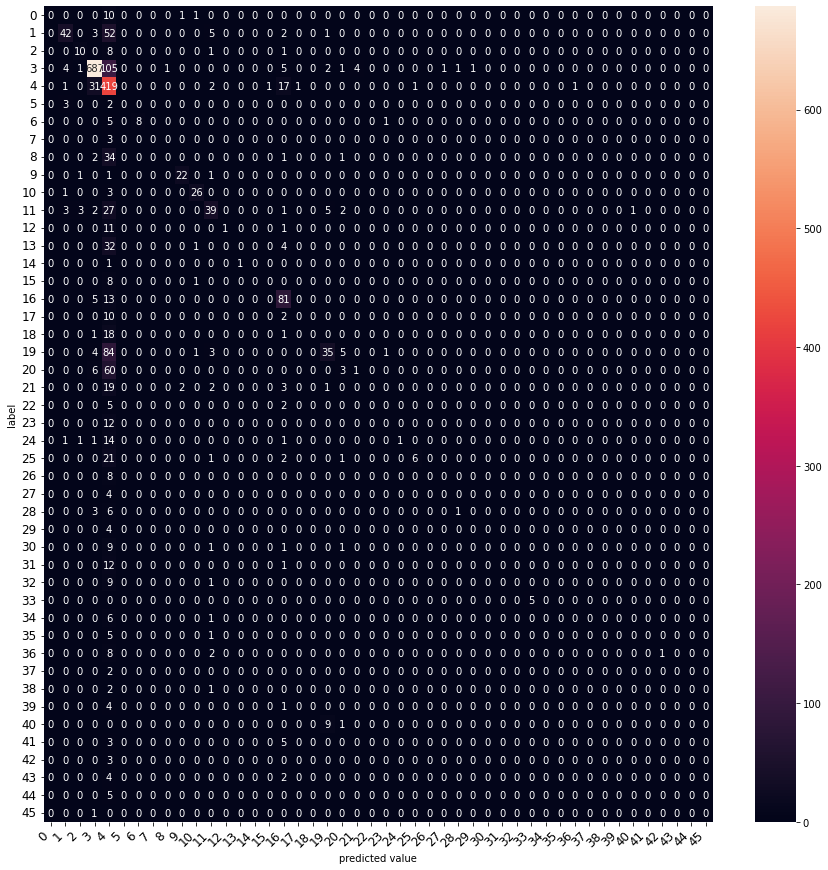

In [79]:
# 결정 트리
print("[결정 트리]")
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[결정 트리의 Classification Report]")
print(classification_report(y_test, tree.predict(tfidfv_test)))
print("\n")
print("[결정 트리의 Confusion Matrix]")
graph_confusion_matrix(tree, tfidfv_test, y_test)

[랜덤 포레스트]
정확도: 0.692787177203918


[랜덤 포레스트의 Classification Report]
              precision    recall  f1-score   support

           0       0.44      0.67      0.53        12
           1       0.40      0.69      0.51       105
           2       0.50      0.45      0.47        20
           3       0.86      0.91      0.88       813
           4       0.67      0.85      0.75       474
           5       0.00      0.00      0.00         5
           6       0.55      0.43      0.48        14
           7       0.33      0.33      0.33         3
           8       0.51      0.50      0.51        38
           9       0.72      0.52      0.60        25
          10       0.47      0.23      0.31        30
          11       0.52      0.67      0.59        83
          12       0.50      0.23      0.32        13
          13       0.41      0.30      0.34        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16 

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


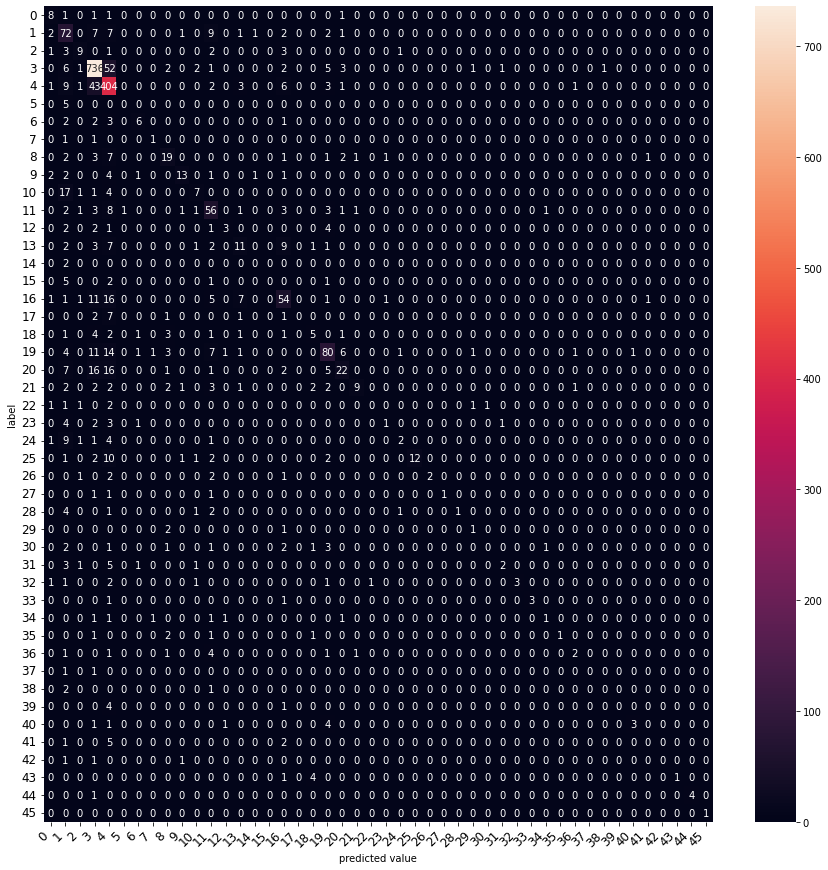

In [80]:
# 랜덤 포레스트
print("[랜덤 포레스트]")
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[랜덤 포레스트의 Classification Report]")
print(classification_report(y_test, forest.predict(tfidfv_test)))
print("\n")
print("[랜덤 포레스트의 Confusion Matrix]")
graph_confusion_matrix(forest, tfidfv_test, y_test)

[그래디언트 부스팅 트리]
정확도: 0.0013357079252003562


[그래디언트 부스팅 트리의 Classification Report]


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00       105
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00       813
           4       0.00      0.00      0.00       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00        25
          10       0.00      0.00      0.00        30
          11       0.00      0.00      0.00        83
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.00      0.00      0.00        99
          17       0.00    

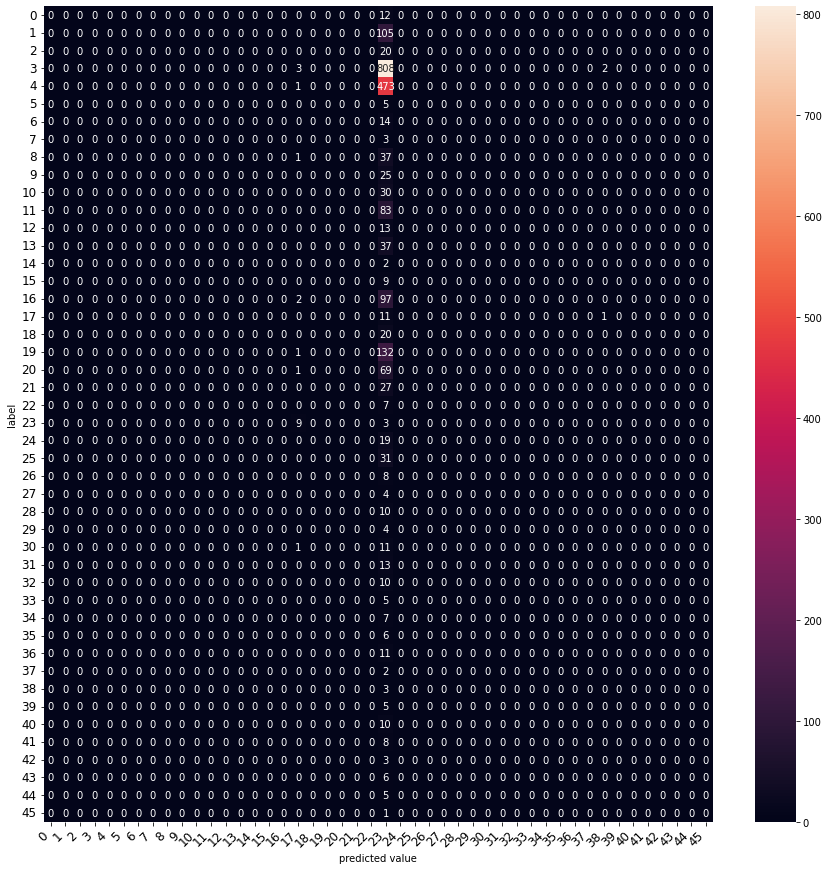

In [81]:
# 그래디언트 부스팅 트리
print("[그래디언트 부스팅 트리]")
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)

predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[그래디언트 부스팅 트리의 Classification Report]")
print(classification_report(y_test, grbt.predict(tfidfv_test)))
print("\n")
print("[그래디언트 부스팅 트리의 Confusion Matrix]")
graph_confusion_matrix(grbt, tfidfv_test, y_test)

[보팅]


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


정확도: 0.699020480854853


[보팅의 Classification Report]


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.88      0.58      0.70        12
           1       0.88      0.60      0.71       105
           2       0.82      0.45      0.58        20
           3       0.96      0.88      0.92       813
           4       0.91      0.80      0.85       474
           5       0.00      0.00      0.00         5
           6       0.92      0.86      0.89        14
           7       1.00      0.33      0.50         3
           8       0.76      0.50      0.60        38
           9       0.82      0.72      0.77        25
          10       0.95      0.67      0.78        30
          11       0.84      0.57      0.68        83
          12       1.00      0.15      0.27        13
          13       0.71      0.46      0.56        37
          14       1.00      0.50      0.67         2
          15       0.50      0.11      0.18         9
          16       0.84      0.59      0.69        99
          17       0.12    

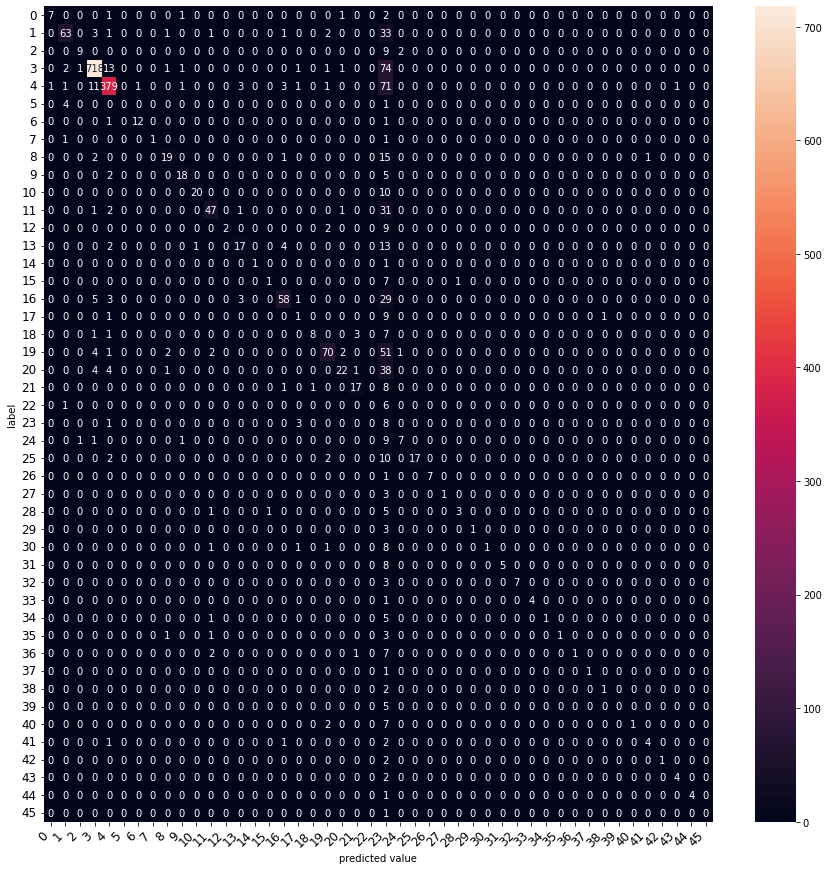

In [82]:
# 보팅
print("[보팅]")
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)

predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[보팅의 Classification Report]")
print(classification_report(y_test, voting_classifier.predict(tfidfv_test)))
print("\n")
print("[보팅의 Confusion Matrix]")
graph_confusion_matrix(voting_classifier, tfidfv_test, y_test)

## 3. 직접 단어 개수를 설정해서 사용

### 3-1. num_words = 20000

In [83]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=20000, test_split=0.2)

print('훈련 샘플의 수: {}'.format(len(x_train)))
print('시험 샘플의 수: {}'.format(len(x_test)))

word_index = reuters.get_word_index(path="reuters_word_index.json")

print(word_index['the'])
print(word_index['it'])

index_to_word = {index + 3 : word for word, index in word_index.items()}
print(index_to_word[4]) # the
print(index_to_word[16]) # it

for index, token in enumerate(("", "", "")):
    index_to_word[index]=token

print(' '.join([index_to_word[index] for index in x_train[0]]))

decoded= []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded

decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded

dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

훈련 샘플의 수: 8982
시험 샘플의 수: 2246
1
13
the
it
   said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
(8982, 18477)
(8982, 18477)


[나이브 베이즈 분류기]
- 정확도: 0.6211041852181657


[나이브 베이즈 분류기의 Classification Report]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.78      0.40      0.53       105
           2       0.00      0.00      0.00        20
           3       0.75      0.92      0.82       813
           4       0.46      0.96      0.63       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.04      0.08        25
          10       0.00      0.00      0.00        30
          11       0.76      0.37      0.50        83
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
  

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


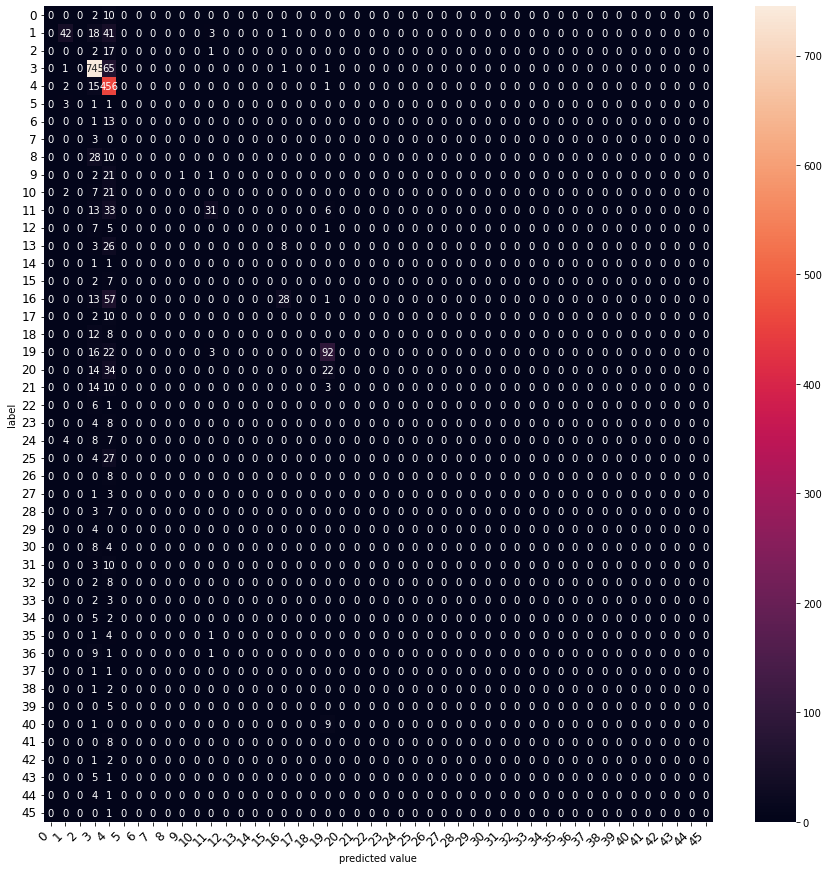

In [84]:
# 나이브 베이즈 분류기
print("[나이브 베이즈 분류기]")
mod = MultinomialNB()
mod.fit(tfidfv, y_train)

x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

predicted = mod.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("- 정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[나이브 베이즈 분류기의 Classification Report]")
print(classification_report(y_test, mod.predict(tfidfv_test)))
print("\n")      
print("[나이브 베이즈 분류기의 Confusion Matrix]")
graph_confusion_matrix(mod, tfidfv_test, y_test)

[CNB]
정확도: 0.7693677649154052


[CNB의 Classification Report]
              precision    recall  f1-score   support

           0       0.75      0.50      0.60        12
           1       0.64      0.89      0.74       105
           2       0.91      0.50      0.65        20
           3       0.89      0.91      0.90       813
           4       0.76      0.93      0.84       474
           5       0.00      0.00      0.00         5
           6       0.92      0.86      0.89        14
           7       1.00      0.67      0.80         3
           8       0.44      0.11      0.17        38
           9       0.82      0.92      0.87        25
          10       0.96      0.73      0.83        30
          11       0.54      0.70      0.61        83
          12       0.00      0.00      0.00        13
          13       0.61      0.54      0.57        37
          14       0.00      0.00      0.00         2
          15       0.50      0.11      0.18         9
          16       0

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


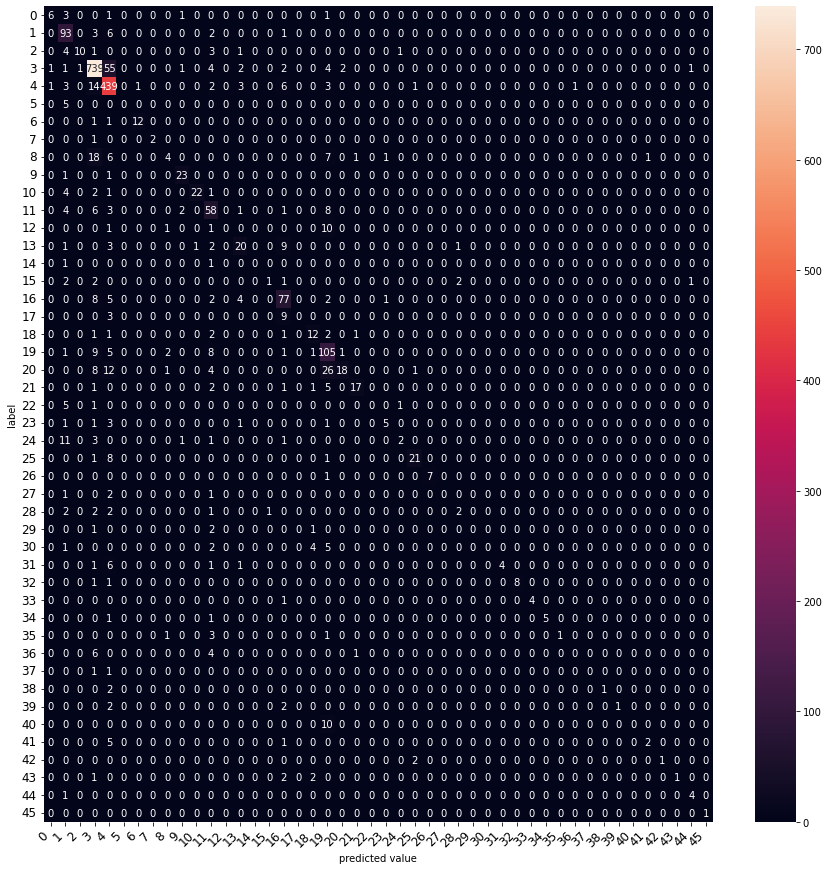

In [85]:
# CNB
print("[CNB]")
cb = ComplementNB()
cb.fit(tfidfv, y_train)

predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[CNB의 Classification Report]")
print(classification_report(y_test, cb.predict(tfidfv_test)))
print("\n")
print("[CNB의 Confusion Matrix]")
graph_confusion_matrix(cb, tfidfv_test, y_test)

[로지스틱 회귀]


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with n

정확도: 0.8103294746215495


[로지스틱 회귀의 Classification Report]
              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.75      0.79      0.77       105
           2       0.70      0.70      0.70        20
           3       0.91      0.93      0.92       813
           4       0.81      0.87      0.84       474
           5       0.00      0.00      0.00         5
           6       0.93      1.00      0.97        14
           7       1.00      0.67      0.80         3
           8       0.68      0.71      0.69        38
           9       0.81      0.88      0.85        25
          10       0.93      0.87      0.90        30
          11       0.65      0.73      0.69        83
          12       0.57      0.31      0.40        13
          13       0.64      0.62      0.63        37
          14       0.67      1.00      0.80         2
          15       0.71      0.56      0.63         9
          16       0.7

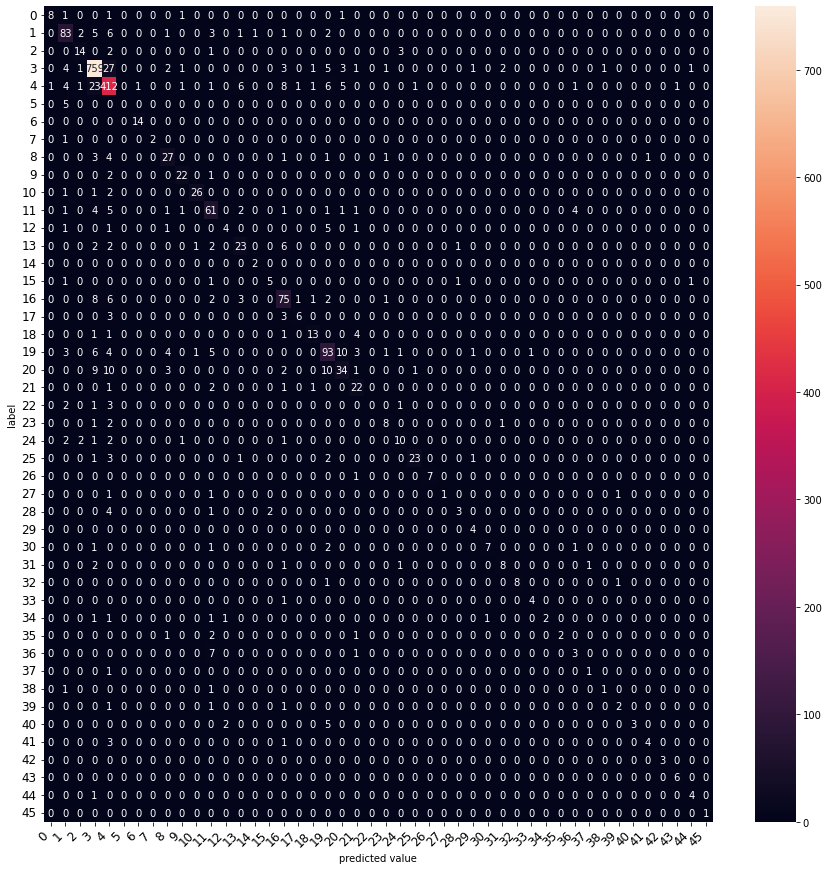

In [86]:
# 로지스틱 회귀
print("[로지스틱 회귀]")
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(tfidfv, y_train)

predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[로지스틱 회귀의 Classification Report]")
print(classification_report(y_test, lr.predict(tfidfv_test)))
print("\n")
print("[로지스틱 회귀의 Confusion Matrix]")
graph_confusion_matrix(lr, tfidfv_test, y_test)

[서포트 벡터 머신]


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


정확도: 0.7742653606411398


[서포트 벡터 머신의 Classification Report]
              precision    recall  f1-score   support

           0       0.78      0.58      0.67        12
           1       0.70      0.73      0.72       105
           2       0.68      0.65      0.67        20
           3       0.91      0.92      0.91       813
           4       0.80      0.84      0.82       474
           5       1.00      0.20      0.33         5
           6       0.93      0.93      0.93        14
           7       1.00      0.33      0.50         3
           8       0.64      0.66      0.65        38
           9       0.92      0.88      0.90        25
          10       0.86      0.83      0.85        30
          11       0.63      0.69      0.66        83
          12       0.27      0.23      0.25        13
          13       0.55      0.57      0.56        37
          14       0.25      0.50      0.33         2
          15       0.40      0.22      0.29         9
          16       0

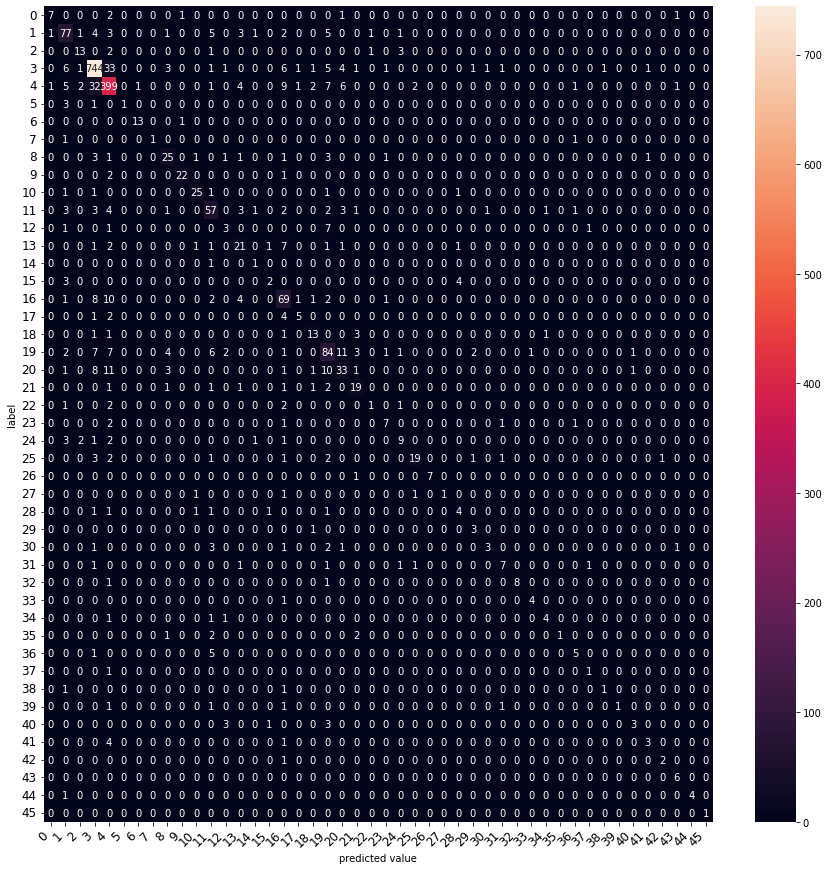

In [87]:
# 서포트 벡터 머신
print("[서포트 벡터 머신]")
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train)

predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[서포트 벡터 머신의 Classification Report]")
print(classification_report(y_test, lsvc.predict(tfidfv_test)))
print("\n")
print("[서포트 벡터 머신의 Confusion Matrix]")
graph_confusion_matrix(lsvc, tfidfv_test, y_test)

[결정 트리]
정확도: 0.6260017809439002


[결정 트리의 Classification Report]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.64      0.41      0.50       105
           2       0.62      0.40      0.48        20
           3       0.95      0.85      0.89       813
           4       0.40      0.91      0.56       474
           5       0.00      0.00      0.00         5
           6       0.75      0.21      0.33        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.16      0.28        25
          10       0.89      0.80      0.84        30
          11       0.60      0.64      0.62        83
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16    

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


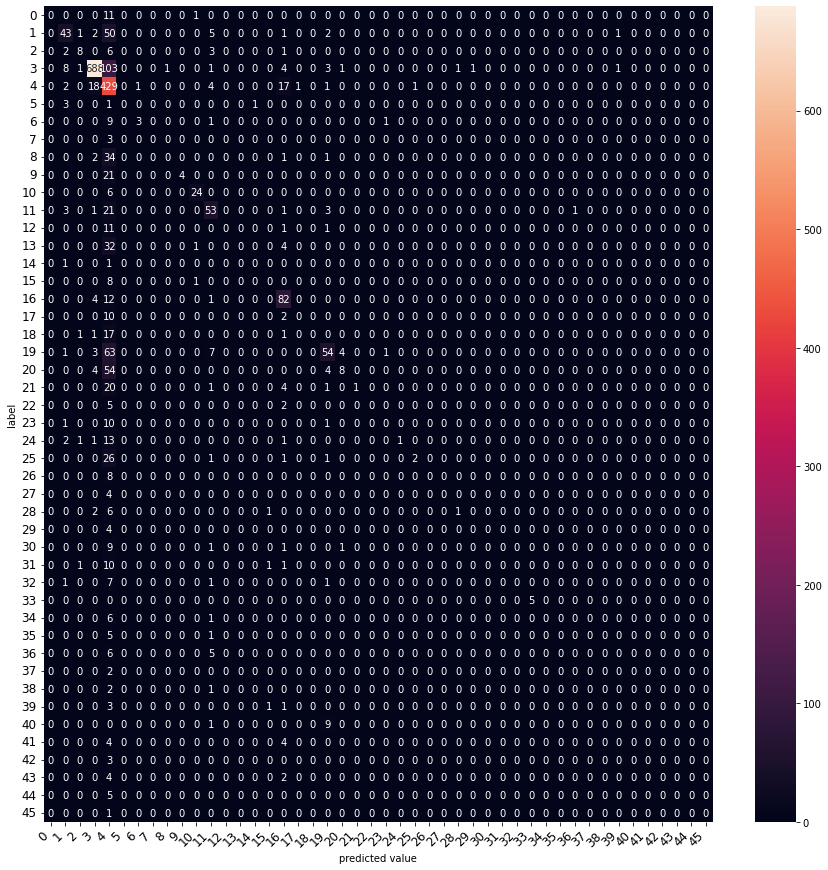

In [88]:
# 결정 트리
print("[결정 트리]")
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[결정 트리의 Classification Report]")
print(classification_report(y_test, tree.predict(tfidfv_test)))
print("\n")
print("[결정 트리의 Confusion Matrix]")
graph_confusion_matrix(tree, tfidfv_test, y_test)

[랜덤 포레스트]
정확도: 0.6642920747996438


[랜덤 포레스트의 Classification Report]
              precision    recall  f1-score   support

           0       0.30      0.58      0.40        12
           1       0.37      0.67      0.48       105
           2       0.35      0.35      0.35        20
           3       0.82      0.90      0.86       813
           4       0.66      0.82      0.73       474
           5       0.00      0.00      0.00         5
           6       0.64      0.64      0.64        14
           7       0.25      0.33      0.29         3
           8       0.50      0.42      0.46        38
           9       0.56      0.40      0.47        25
          10       0.73      0.37      0.49        30
          11       0.52      0.55      0.54        83
          12       0.50      0.15      0.24        13
          13       0.38      0.24      0.30        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


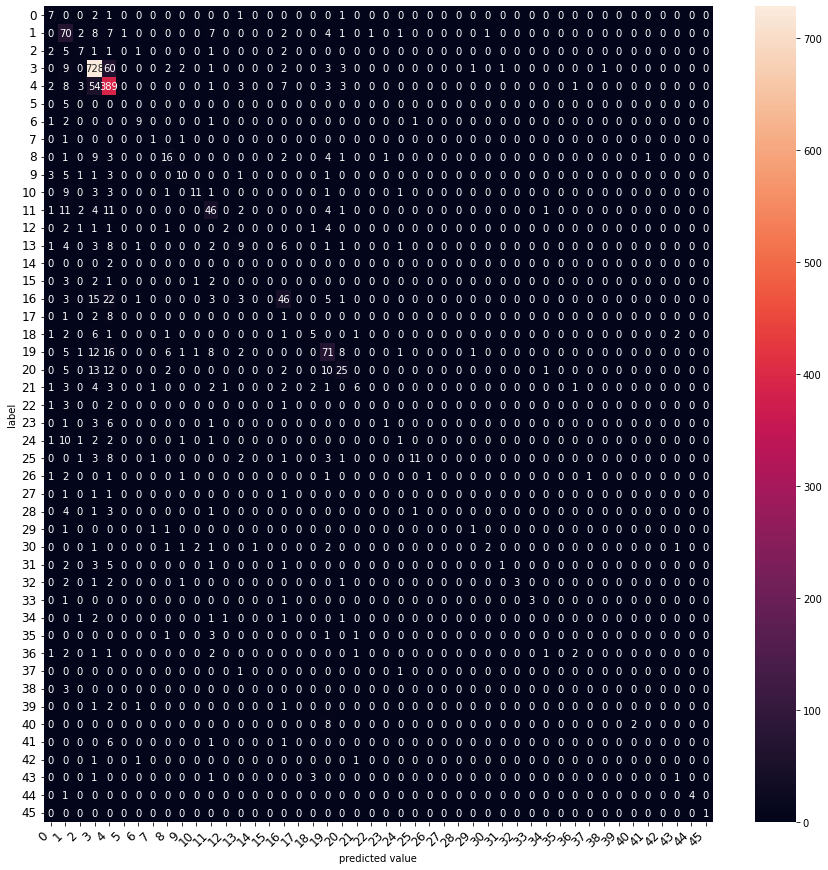

In [89]:
# 랜덤 포레스트
print("[랜덤 포레스트]")
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[랜덤 포레스트의 Classification Report]")
print(classification_report(y_test, forest.predict(tfidfv_test)))
print("\n")
print("[랜덤 포레스트의 Confusion Matrix]")
graph_confusion_matrix(forest, tfidfv_test, y_test)

[그래디언트 부스팅 트리]
정확도: 0.7626892252894034


[그래디언트 부스팅 트리의 Classification Report]
              precision    recall  f1-score   support

           0       0.62      0.67      0.64        12
           1       0.74      0.71      0.73       105
           2       0.67      0.70      0.68        20
           3       0.87      0.90      0.88       813
           4       0.78      0.83      0.80       474
           5       1.00      0.20      0.33         5
           6       0.91      0.71      0.80        14
           7       0.33      0.33      0.33         3
           8       0.61      0.66      0.63        38
           9       0.83      0.76      0.79        25
          10       0.86      0.80      0.83        30
          11       0.62      0.66      0.64        83
          12       0.58      0.54      0.56        13
          13       0.55      0.43      0.48        37
          14       0.10      0.50      0.17         2
          15       0.00      0.00      0.00         9
  

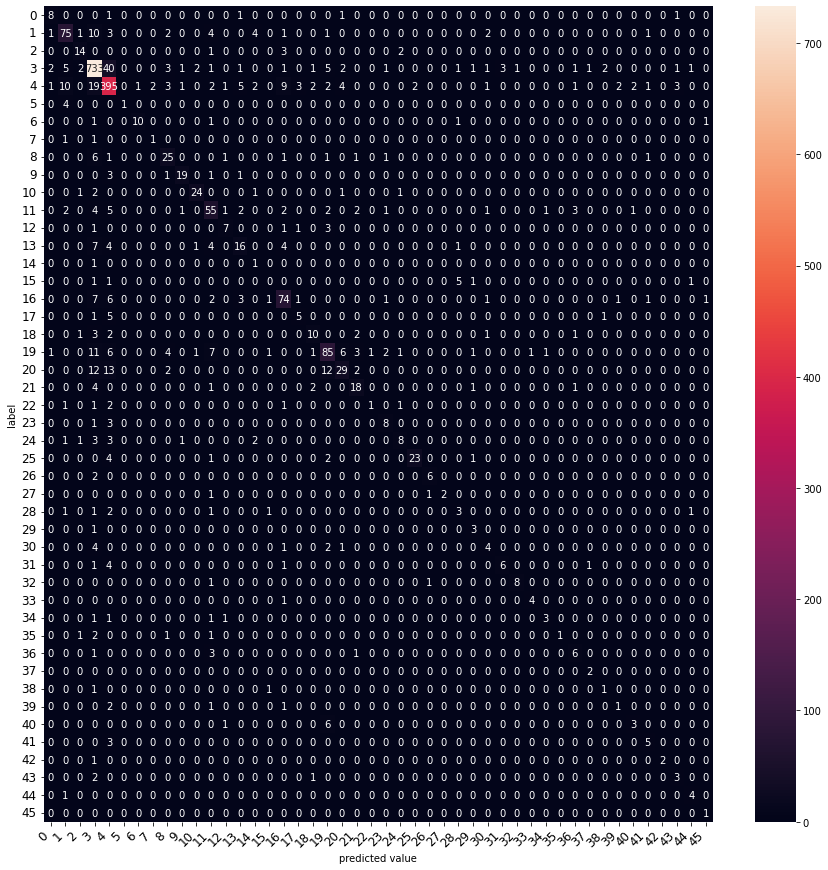

In [90]:
# 그래디언트 부스팅 트리
print("[그래디언트 부스팅 트리]")
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)

predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[그래디언트 부스팅 트리의 Classification Report]")
print(classification_report(y_test, grbt.predict(tfidfv_test)))
print("\n")
print("[그래디언트 부스팅 트리의 Confusion Matrix]")
graph_confusion_matrix(grbt, tfidfv_test, y_test)

[보팅]


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


정확도: 0.8125556544968834


[보팅의 Classification Report]
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.79      0.76      0.78       105
           2       0.67      0.80      0.73        20
           3       0.92      0.94      0.93       813
           4       0.82      0.88      0.85       474
           5       1.00      0.20      0.33         5
           6       0.92      0.86      0.89        14
           7       1.00      0.67      0.80         3
           8       0.69      0.71      0.70        38
           9       0.80      0.80      0.80        25
          10       0.93      0.90      0.92        30
          11       0.68      0.70      0.69        83
          12       0.60      0.46      0.52        13
          13       0.69      0.65      0.67        37
          14       0.20      1.00      0.33         2
          15       0.50      0.22      0.31         9
          16       0.73    

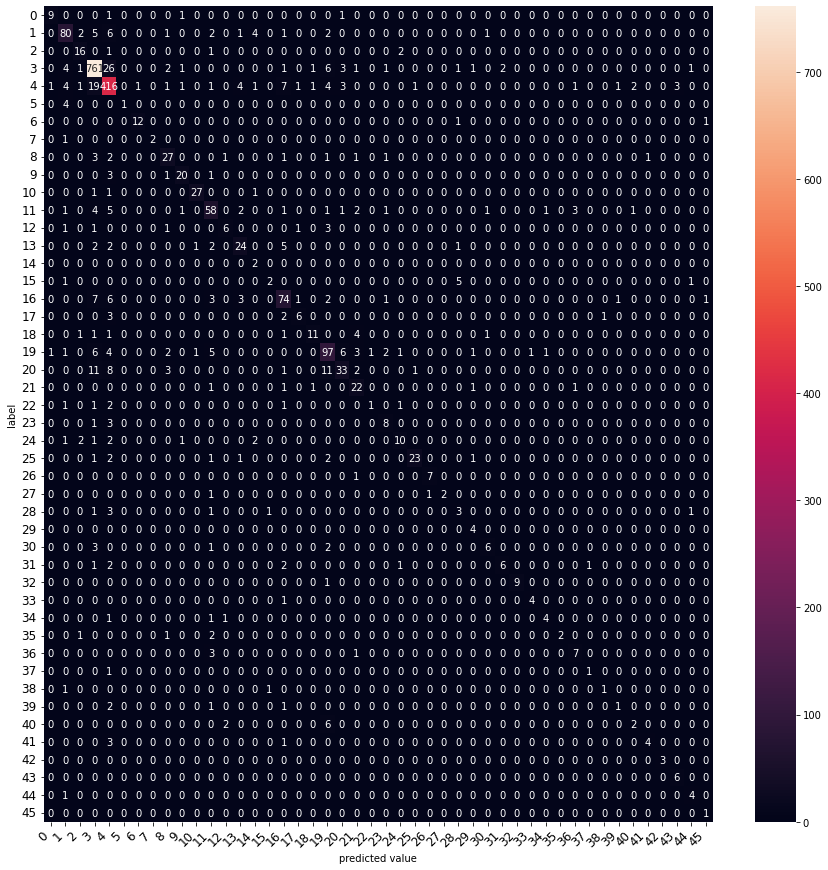

In [91]:
# 보팅
print("[보팅]")
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)

predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[보팅의 Classification Report]")
print(classification_report(y_test, voting_classifier.predict(tfidfv_test)))
print("\n")
print("[보팅의 Confusion Matrix]")
graph_confusion_matrix(voting_classifier, tfidfv_test, y_test)

### 3-2. num_words = 15000

In [92]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=15000, test_split=0.2)

print('훈련 샘플의 수: {}'.format(len(x_train)))
print('시험 샘플의 수: {}'.format(len(x_test)))

word_index = reuters.get_word_index(path="reuters_word_index.json")

print(word_index['the'])
print(word_index['it'])

index_to_word = {index + 3 : word for word, index in word_index.items()}
print(index_to_word[4]) # the
print(index_to_word[16]) # it

for index, token in enumerate(("", "", "")):
    index_to_word[index]=token

print(' '.join([index_to_word[index] for index in x_train[0]]))

decoded= []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded

decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded

dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

훈련 샘플의 수: 8982
시험 샘플의 수: 2246
1
13
the
it
   said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
(8982, 14225)
(8982, 14225)


[나이브 베이즈 분류기]
- 정확도: 0.6371326803205699


[나이브 베이즈 분류기의 Classification Report]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.75      0.54      0.63       105
           2       0.00      0.00      0.00        20
           3       0.78      0.91      0.84       813
           4       0.48      0.96      0.64       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.04      0.08        25
          10       0.00      0.00      0.00        30
          11       0.70      0.42      0.53        83
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
  

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


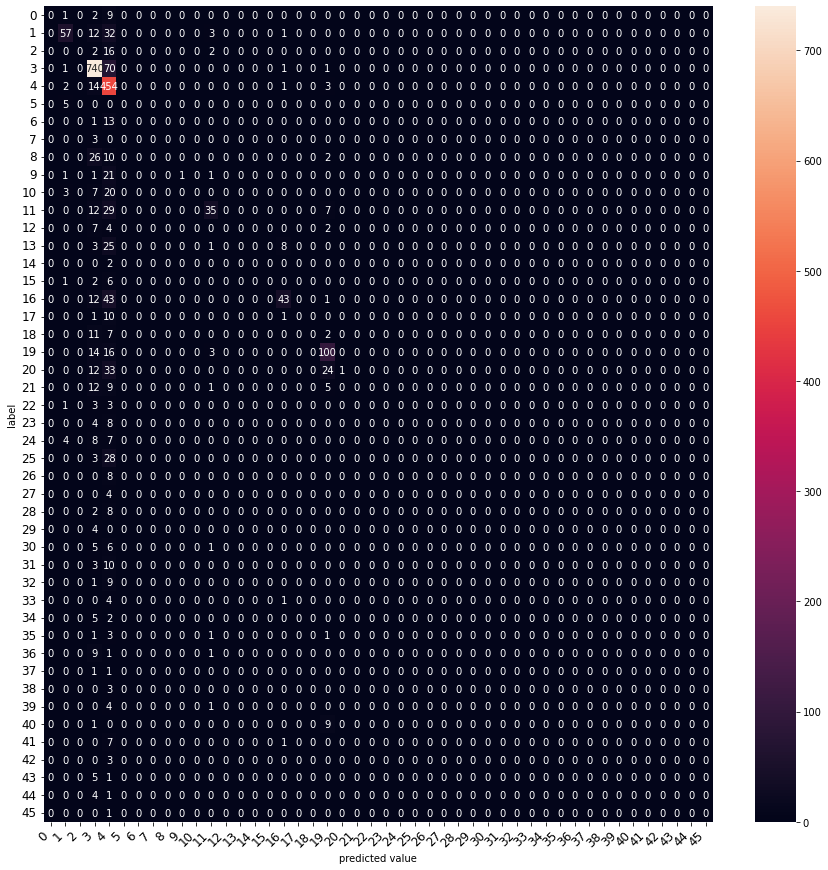

In [93]:
# 나이브 베이즈 분류기
print("[나이브 베이즈 분류기]")
mod = MultinomialNB()
mod.fit(tfidfv, y_train)

x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

predicted = mod.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("- 정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[나이브 베이즈 분류기의 Classification Report]")
print(classification_report(y_test, mod.predict(tfidfv_test)))
print("\n")      
print("[나이브 베이즈 분류기의 Confusion Matrix]")
graph_confusion_matrix(mod, tfidfv_test, y_test)

[CNB]
정확도: 0.7729296527159395


[CNB의 Classification Report]
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.64      0.90      0.75       105
           2       0.91      0.50      0.65        20
           3       0.90      0.90      0.90       813
           4       0.77      0.92      0.84       474
           5       0.00      0.00      0.00         5
           6       0.93      0.93      0.93        14
           7       1.00      0.67      0.80         3
           8       0.50      0.13      0.21        38
           9       0.82      0.92      0.87        25
          10       0.96      0.80      0.87        30
          11       0.54      0.71      0.61        83
          12       0.00      0.00      0.00        13
          13       0.57      0.57      0.57        37
          14       0.00      0.00      0.00         2
          15       0.50      0.11      0.18         9
          16       0

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


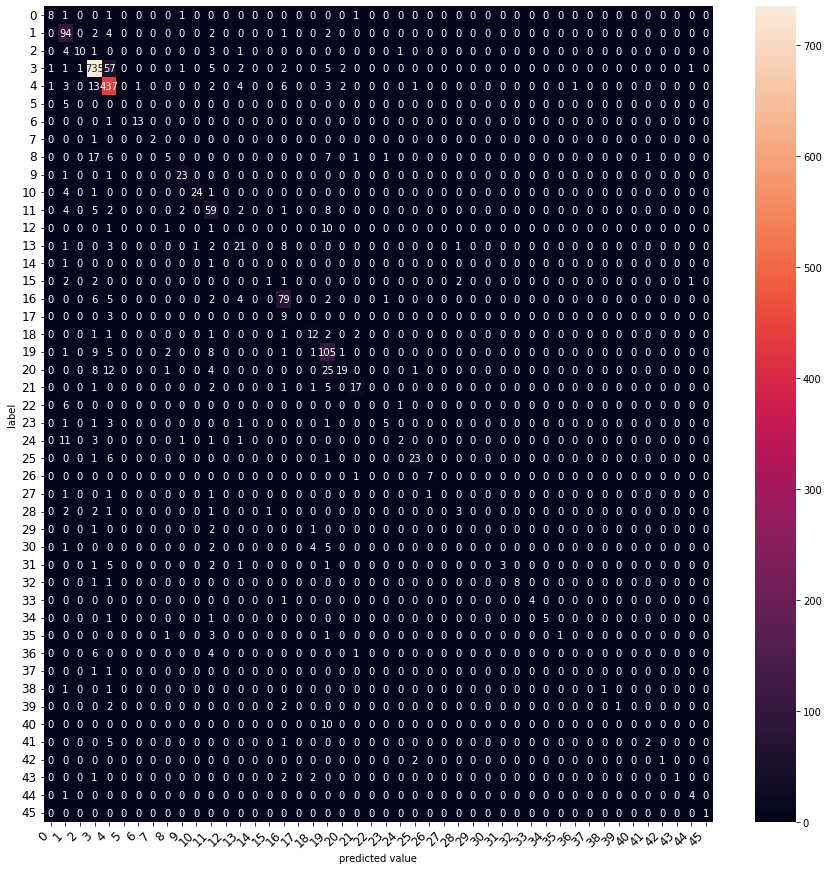

In [94]:
# CNB
print("[CNB]")
cb = ComplementNB()
cb.fit(tfidfv, y_train)

predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[CNB의 Classification Report]")
print(classification_report(y_test, cb.predict(tfidfv_test)))
print("\n")
print("[CNB의 Confusion Matrix]")
graph_confusion_matrix(cb, tfidfv_test, y_test)

[로지스틱 회귀]


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with n

정확도: 0.8125556544968834


[로지스틱 회귀의 Classification Report]
              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.74      0.80      0.77       105
           2       0.70      0.70      0.70        20
           3       0.92      0.93      0.92       813
           4       0.81      0.88      0.84       474
           5       0.00      0.00      0.00         5
           6       0.92      0.86      0.89        14
           7       1.00      0.67      0.80         3
           8       0.69      0.71      0.70        38
           9       0.81      0.88      0.85        25
          10       0.93      0.87      0.90        30
          11       0.64      0.75      0.69        83
          12       0.57      0.31      0.40        13
          13       0.64      0.62      0.63        37
          14       0.67      1.00      0.80         2
          15       0.71      0.56      0.63         9
          16       0.7

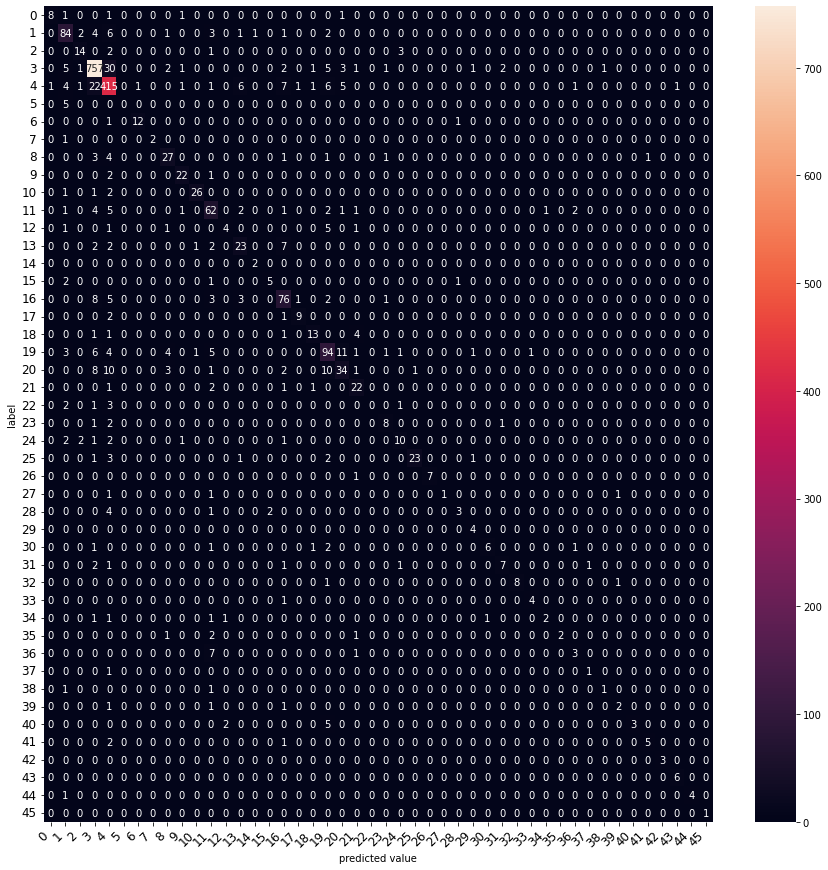

In [95]:
# 로지스틱 회귀
print("[로지스틱 회귀]")
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(tfidfv, y_train)

predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[로지스틱 회귀의 Classification Report]")
print(classification_report(y_test, lr.predict(tfidfv_test)))
print("\n")
print("[로지스틱 회귀의 Confusion Matrix]")
graph_confusion_matrix(lr, tfidfv_test, y_test)

[서포트 벡터 머신]


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


정확도: 0.7742653606411398


[서포트 벡터 머신의 Classification Report]
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.70      0.71      0.71       105
           2       0.62      0.65      0.63        20
           3       0.90      0.91      0.91       813
           4       0.79      0.84      0.82       474
           5       0.00      0.00      0.00         5
           6       0.69      0.79      0.73        14
           7       1.00      0.67      0.80         3
           8       0.67      0.68      0.68        38
           9       0.95      0.84      0.89        25
          10       0.96      0.83      0.89        30
          11       0.59      0.71      0.64        83
          12       0.30      0.23      0.26        13
          13       0.63      0.59      0.61        37
          14       1.00      0.50      0.67         2
          15       0.43      0.33      0.38         9
          16       0

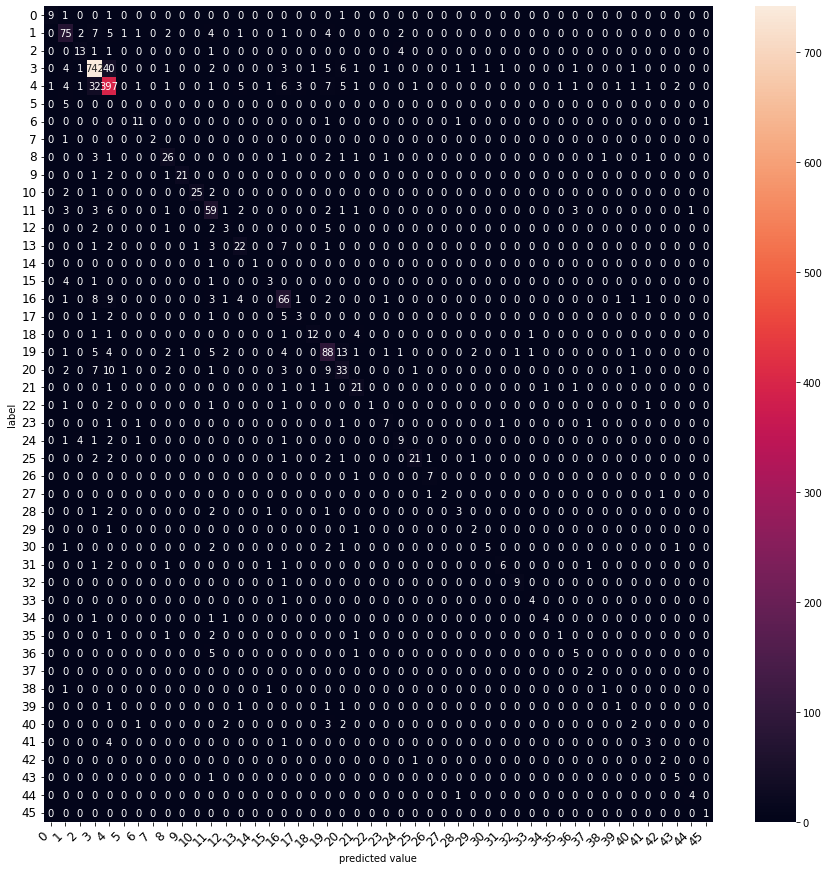

In [96]:
# 서포트 벡터 머신
print("[서포트 벡터 머신]")
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train)

predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[서포트 벡터 머신의 Classification Report]")
print(classification_report(y_test, lsvc.predict(tfidfv_test)))
print("\n")
print("[서포트 벡터 머신의 Confusion Matrix]")
graph_confusion_matrix(lsvc, tfidfv_test, y_test)

[결정 트리]
정확도: 0.6237756010685663


[결정 트리의 Classification Report]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.76      0.42      0.54       105
           2       0.60      0.45      0.51        20
           3       0.94      0.85      0.89       813
           4       0.40      0.91      0.55       474
           5       0.00      0.00      0.00         5
           6       1.00      0.64      0.78        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.88      0.88      0.88        25
          10       0.86      0.83      0.85        30
          11       0.65      0.48      0.55        83
          12       0.14      0.08      0.10        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16    

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


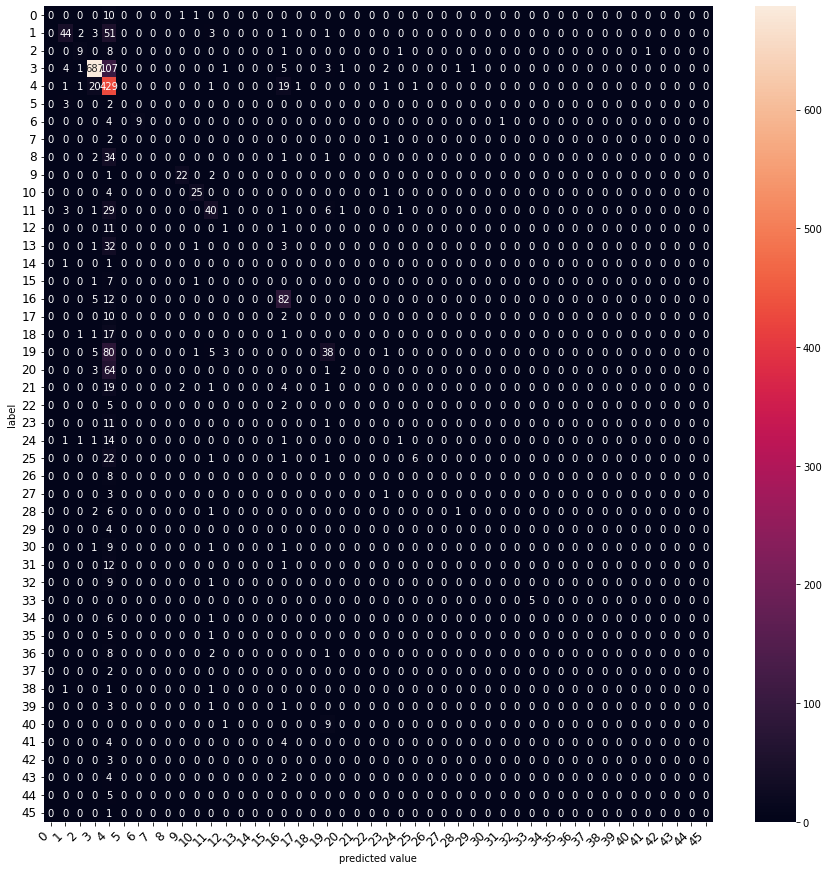

In [97]:
# 결정 트리
print("[결정 트리]")
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[결정 트리의 Classification Report]")
print(classification_report(y_test, tree.predict(tfidfv_test)))
print("\n")
print("[결정 트리의 Confusion Matrix]")
graph_confusion_matrix(tree, tfidfv_test, y_test)

[랜덤 포레스트]
정확도: 0.6776491540516474


[랜덤 포레스트의 Classification Report]
              precision    recall  f1-score   support

           0       0.23      0.58      0.33        12
           1       0.42      0.67      0.52       105
           2       0.41      0.35      0.38        20
           3       0.80      0.90      0.85       813
           4       0.66      0.84      0.74       474
           5       0.00      0.00      0.00         5
           6       0.67      0.43      0.52        14
           7       0.50      0.33      0.40         3
           8       0.58      0.55      0.57        38
           9       0.43      0.24      0.31        25
          10       0.67      0.33      0.44        30
          11       0.54      0.58      0.56        83
          12       0.67      0.31      0.42        13
          13       0.44      0.30      0.35        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


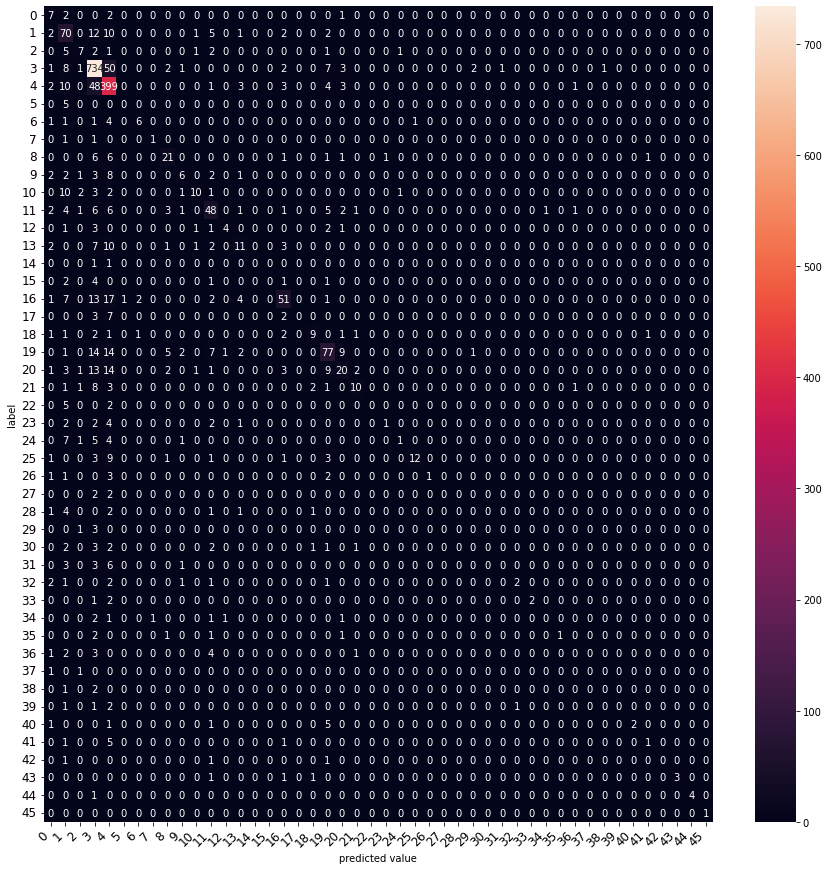

In [98]:
# 랜덤 포레스트
print("[랜덤 포레스트]")
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[랜덤 포레스트의 Classification Report]")
print(classification_report(y_test, forest.predict(tfidfv_test)))
print("\n")
print("[랜덤 포레스트의 Confusion Matrix]")
graph_confusion_matrix(forest, tfidfv_test, y_test)

[그래디언트 부스팅 트리]
정확도: 0.7720391807658059


[그래디언트 부스팅 트리의 Classification Report]
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.79      0.67      0.72       105
           2       0.67      0.70      0.68        20
           3       0.88      0.91      0.89       813
           4       0.77      0.84      0.80       474
           5       0.25      0.20      0.22         5
           6       0.79      0.79      0.79        14
           7       1.00      0.67      0.80         3
           8       0.62      0.63      0.62        38
           9       0.80      0.80      0.80        25
          10       0.80      0.80      0.80        30
          11       0.66      0.69      0.67        83
          12       0.50      0.54      0.52        13
          13       0.62      0.49      0.55        37
          14       0.11      0.50      0.18         2
          15       0.38      0.33      0.35         9
  

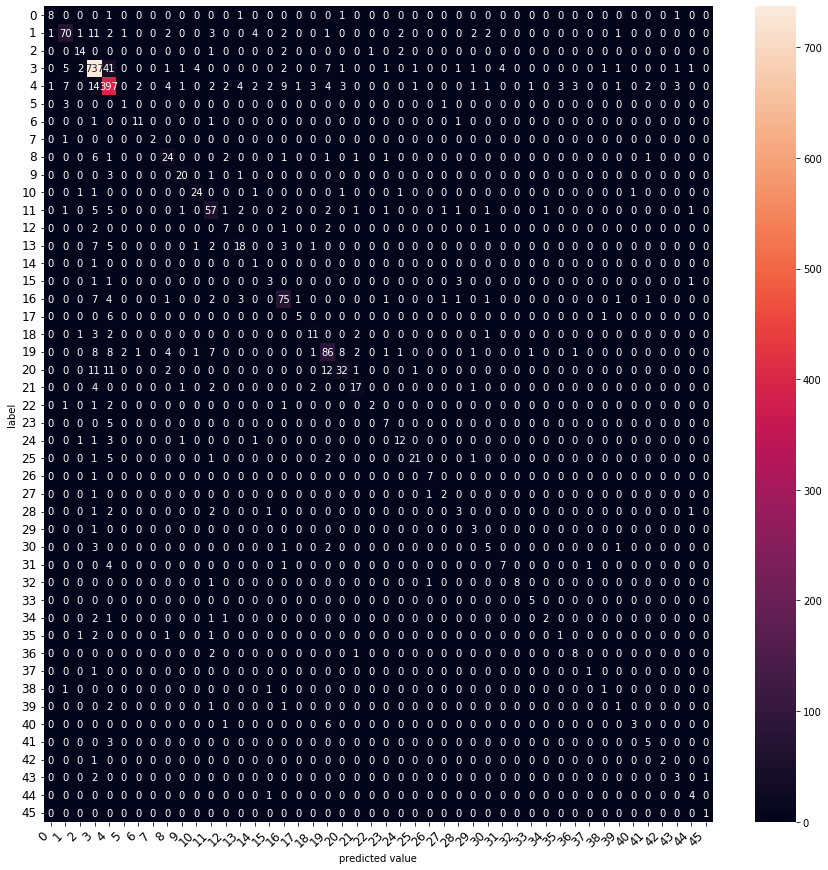

In [99]:
# 그래디언트 부스팅 트리
print("[그래디언트 부스팅 트리]")
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)

predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[그래디언트 부스팅 트리의 Classification Report]")
print(classification_report(y_test, grbt.predict(tfidfv_test)))
print("\n")
print("[그래디언트 부스팅 트리의 Confusion Matrix]")
graph_confusion_matrix(grbt, tfidfv_test, y_test)

[보팅]


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


정확도: 0.8165627782724845


[보팅의 Classification Report]


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.80      0.75      0.77       105
           2       0.68      0.75      0.71        20
           3       0.92      0.93      0.93       813
           4       0.82      0.87      0.85       474
           5       0.00      0.00      0.00         5
           6       0.93      0.93      0.93        14
           7       1.00      0.67      0.80         3
           8       0.68      0.68      0.68        38
           9       0.81      0.88      0.85        25
          10       0.93      0.87      0.90        30
          11       0.70      0.73      0.72        83
          12       0.50      0.46      0.48        13
          13       0.69      0.65      0.67        37
          14       0.22      1.00      0.36         2
          15       0.57      0.44      0.50         9
          16       0.74      0.76      0.75        99
          17       0.80    

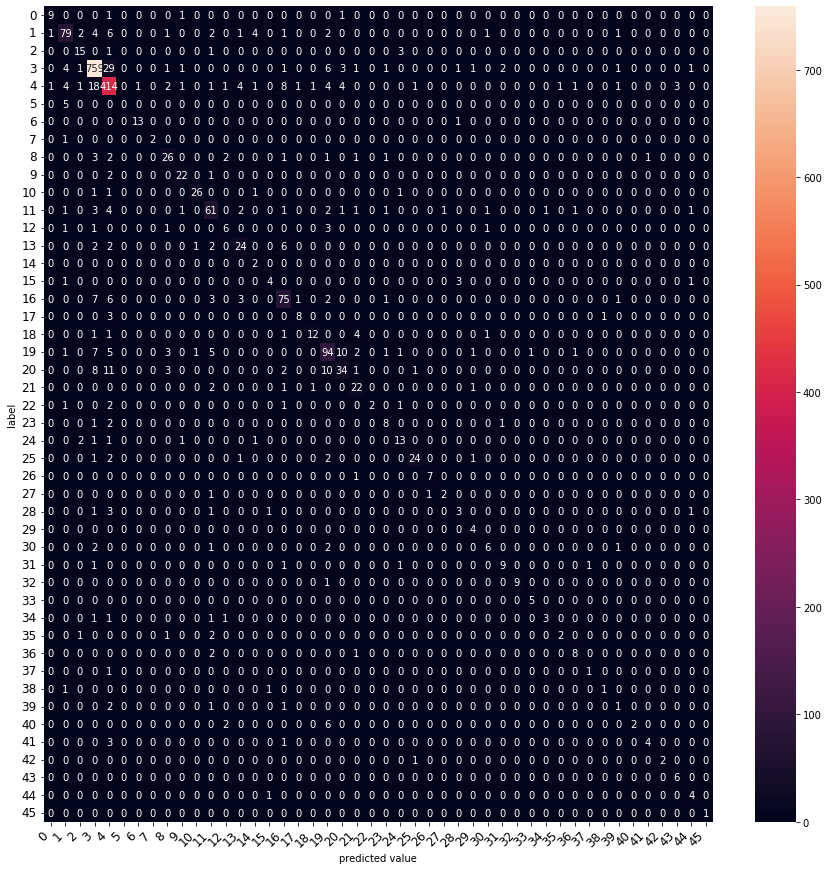

In [100]:
# 보팅
print("[보팅]")
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)

predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[보팅의 Classification Report]")
print(classification_report(y_test, voting_classifier.predict(tfidfv_test)))
print("\n")
print("[보팅의 Confusion Matrix]")
graph_confusion_matrix(voting_classifier, tfidfv_test, y_test)

### 3-3. num_words = 1000

In [101]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

print('훈련 샘플의 수: {}'.format(len(x_train)))
print('시험 샘플의 수: {}'.format(len(x_test)))

word_index = reuters.get_word_index(path="reuters_word_index.json")

print(word_index['the'])
print(word_index['it'])

index_to_word = {index + 3 : word for word, index in word_index.items()}
print(index_to_word[4]) # the
print(index_to_word[16]) # it

for index, token in enumerate(("", "", "")):
    index_to_word[index]=token

print(' '.join([index_to_word[index] for index in x_train[0]]))

decoded= []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded

decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded

dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

훈련 샘플의 수: 8982
시험 샘플의 수: 2246
1
13
the
it
   said as a result of its december acquisition of  co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and   revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash  per share this year should be 2 50 to three dlrs reuter 3
(8982, 967)
(8982, 967)


[나이브 베이즈 분류기]
- 정확도: 0.7079252003561888


[나이브 베이즈 분류기의 Classification Report]
              precision    recall  f1-score   support

           0       0.80      0.33      0.47        12
           1       0.45      0.80      0.58       105
           2       0.00      0.00      0.00        20
           3       0.93      0.87      0.90       813
           4       0.67      0.93      0.78       474
           5       0.00      0.00      0.00         5
           6       1.00      0.07      0.13        14
           7       0.00      0.00      0.00         3
           8       0.68      0.39      0.50        38
           9       0.92      0.48      0.63        25
          10       0.88      0.23      0.37        30
          11       0.43      0.83      0.57        83
          12       0.00      0.00      0.00        13
          13       0.61      0.38      0.47        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
  

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


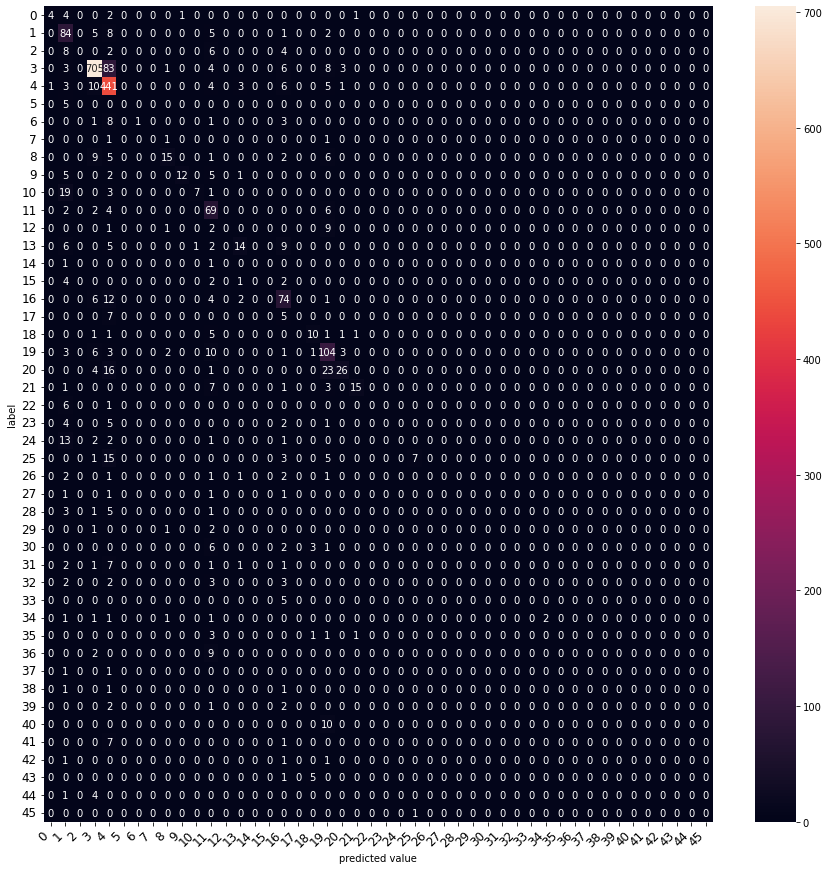

In [102]:
# 나이브 베이즈 분류기
print("[나이브 베이즈 분류기]")
mod = MultinomialNB()
mod.fit(tfidfv, y_train)

x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

predicted = mod.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("- 정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[나이브 베이즈 분류기의 Classification Report]")
print(classification_report(y_test, mod.predict(tfidfv_test)))
print("\n")      
print("[나이브 베이즈 분류기의 Confusion Matrix]")
graph_confusion_matrix(mod, tfidfv_test, y_test)

[CNB]
정확도: 0.738646482635797


[CNB의 Classification Report]
              precision    recall  f1-score   support

           0       0.50      0.50      0.50        12
           1       0.54      0.78      0.64       105
           2       0.00      0.00      0.00        20
           3       0.92      0.89      0.90       813
           4       0.71      0.93      0.81       474
           5       0.00      0.00      0.00         5
           6       0.82      0.64      0.72        14
           7       1.00      0.33      0.50         3
           8       0.67      0.21      0.32        38
           9       0.80      0.96      0.87        25
          10       0.92      0.77      0.84        30
          11       0.49      0.81      0.61        83
          12       0.00      0.00      0.00        13
          13       0.62      0.41      0.49        37
          14       1.00      0.50      0.67         2
          15       0.00      0.00      0.00         9
          16       0.

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


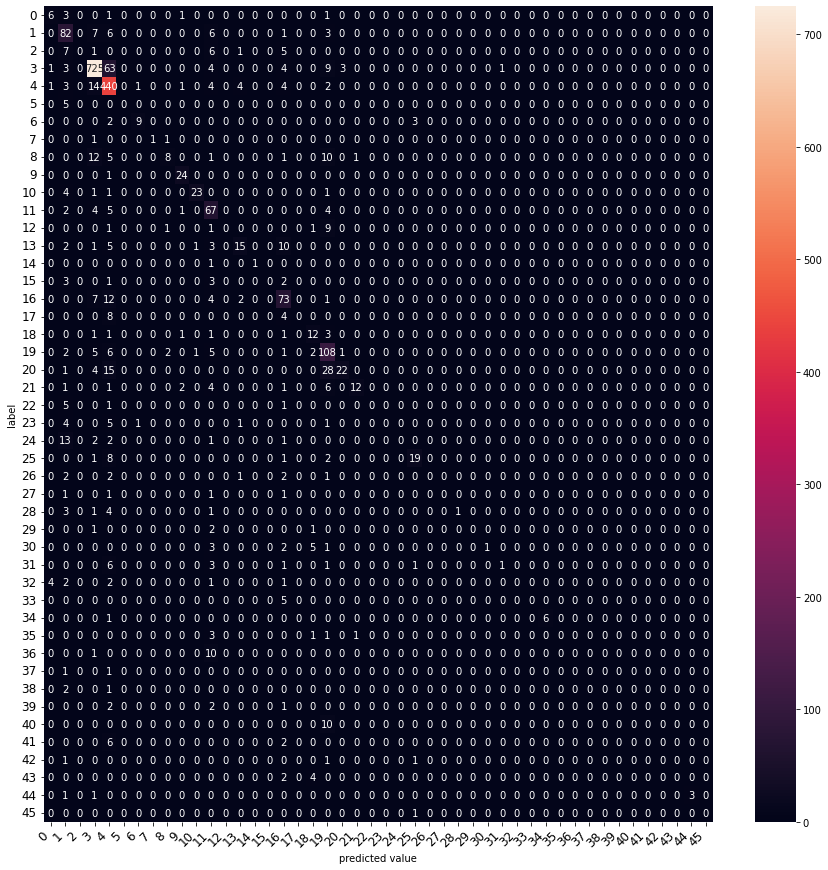

In [103]:
# CNB
print("[CNB]")
cb = ComplementNB()
cb.fit(tfidfv, y_train)

predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[CNB의 Classification Report]")
print(classification_report(y_test, cb.predict(tfidfv_test)))
print("\n")
print("[CNB의 Confusion Matrix]")
graph_confusion_matrix(cb, tfidfv_test, y_test)

[로지스틱 회귀]


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with n

정확도: 0.7644701691896705


[로지스틱 회귀의 Classification Report]
              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.63      0.74      0.68       105
           2       0.67      0.60      0.63        20
           3       0.89      0.92      0.90       813
           4       0.79      0.82      0.80       474
           5       0.00      0.00      0.00         5
           6       0.87      0.93      0.90        14
           7       1.00      0.33      0.50         3
           8       0.65      0.68      0.67        38
           9       0.79      0.76      0.78        25
          10       0.80      0.80      0.80        30
          11       0.59      0.66      0.62        83
          12       0.67      0.46      0.55        13
          13       0.52      0.59      0.56        37
          14       0.67      1.00      0.80         2
          15       0.67      0.44      0.53         9
          16       0.6

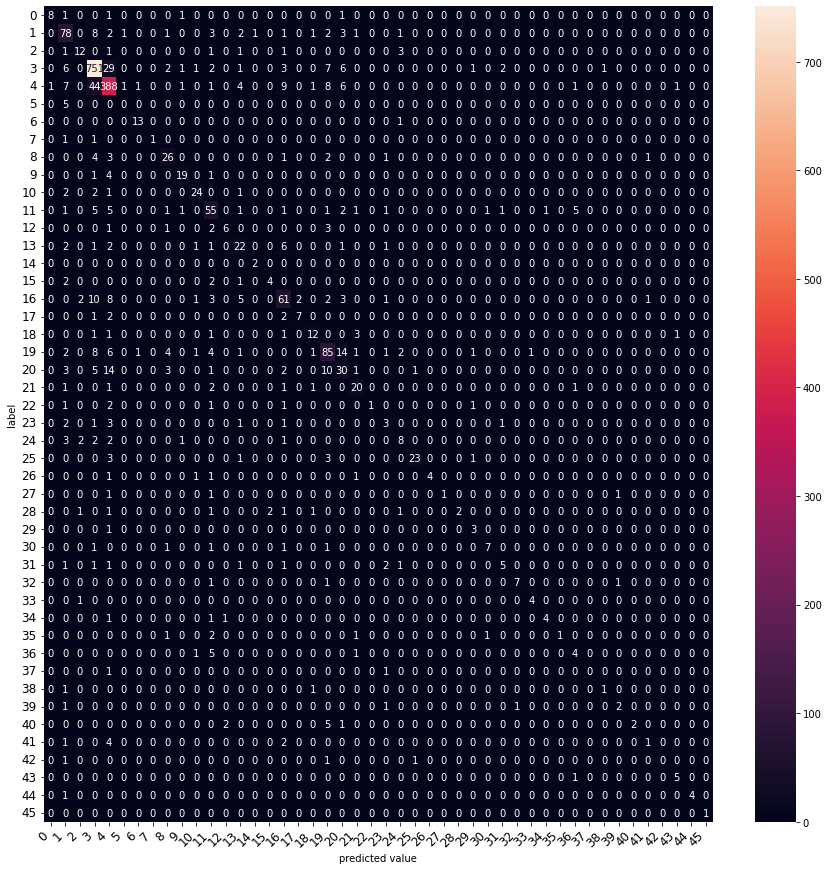

In [104]:
# 로지스틱 회귀
print("[로지스틱 회귀]")
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(tfidfv, y_train)

predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[로지스틱 회귀의 Classification Report]")
print(classification_report(y_test, lr.predict(tfidfv_test)))
print("\n")
print("[로지스틱 회귀의 Confusion Matrix]")
graph_confusion_matrix(lr, tfidfv_test, y_test)

[서포트 벡터 머신]


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


정확도: 0.7212822796081924


[서포트 벡터 머신의 Classification Report]
              precision    recall  f1-score   support

           0       0.73      0.67      0.70        12
           1       0.63      0.70      0.66       105
           2       0.38      0.45      0.41        20
           3       0.90      0.91      0.90       813
           4       0.75      0.78      0.77       474
           5       0.00      0.00      0.00         5
           6       0.67      1.00      0.80        14
           7       1.00      0.33      0.50         3
           8       0.58      0.66      0.62        38
           9       0.72      0.72      0.72        25
          10       0.76      0.73      0.75        30
          11       0.56      0.59      0.58        83
          12       0.44      0.31      0.36        13
          13       0.43      0.62      0.51        37
          14       0.50      0.50      0.50         2
          15       0.25      0.11      0.15         9
          16       0

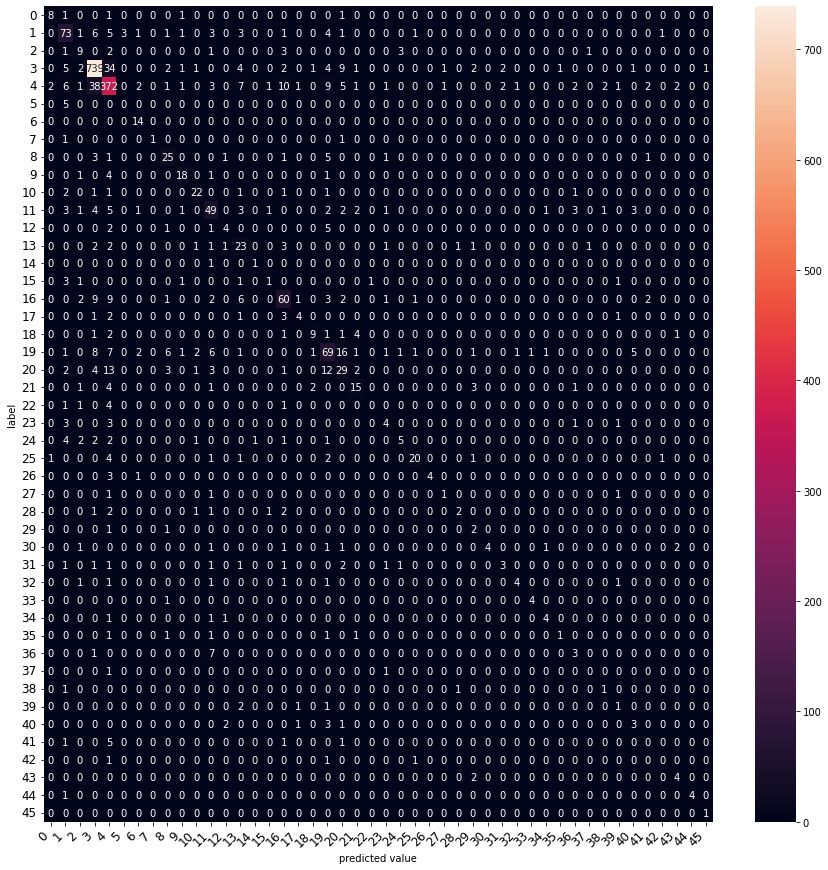

In [105]:
# 서포트 벡터 머신
print("[서포트 벡터 머신]")
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train)

predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[서포트 벡터 머신의 Classification Report]")
print(classification_report(y_test, lsvc.predict(tfidfv_test)))
print("\n")
print("[서포트 벡터 머신의 Confusion Matrix]")
graph_confusion_matrix(lsvc, tfidfv_test, y_test)

[결정 트리]
정확도: 0.6197684772929652


[결정 트리의 Classification Report]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.73      0.41      0.52       105
           2       0.64      0.35      0.45        20
           3       0.91      0.83      0.87       813
           4       0.69      0.80      0.74       474
           5       0.00      0.00      0.00         5
           6       1.00      0.57      0.73        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.85      0.88      0.86        25
          10       0.90      0.90      0.90        30
          11       0.63      0.53      0.58        83
          12       0.12      0.08      0.10        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16    

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


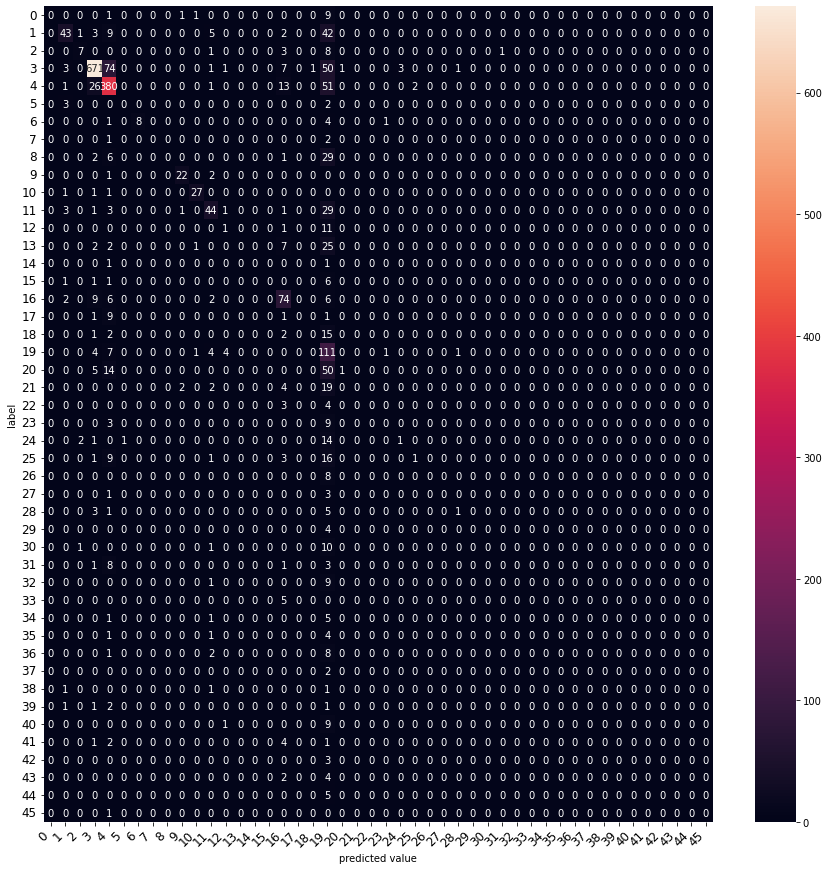

In [106]:
# 결정 트리
print("[결정 트리]")
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[결정 트리의 Classification Report]")
print(classification_report(y_test, tree.predict(tfidfv_test)))
print("\n")
print("[결정 트리의 Confusion Matrix]")
graph_confusion_matrix(tree, tfidfv_test, y_test)

[랜덤 포레스트]
정확도: 0.7128227960819234


[랜덤 포레스트의 Classification Report]
              precision    recall  f1-score   support

           0       0.60      0.75      0.67        12
           1       0.43      0.74      0.54       105
           2       0.33      0.45      0.38        20
           3       0.85      0.91      0.88       813
           4       0.71      0.84      0.77       474
           5       0.00      0.00      0.00         5
           6       0.70      0.50      0.58        14
           7       0.33      0.33      0.33         3
           8       0.65      0.63      0.64        38
           9       0.58      0.44      0.50        25
          10       0.72      0.60      0.65        30
          11       0.56      0.69      0.62        83
          12       0.57      0.31      0.40        13
          13       0.37      0.30      0.33        37
          14       1.00      0.50      0.67         2
          15       0.00      0.00      0.00         9
          16

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


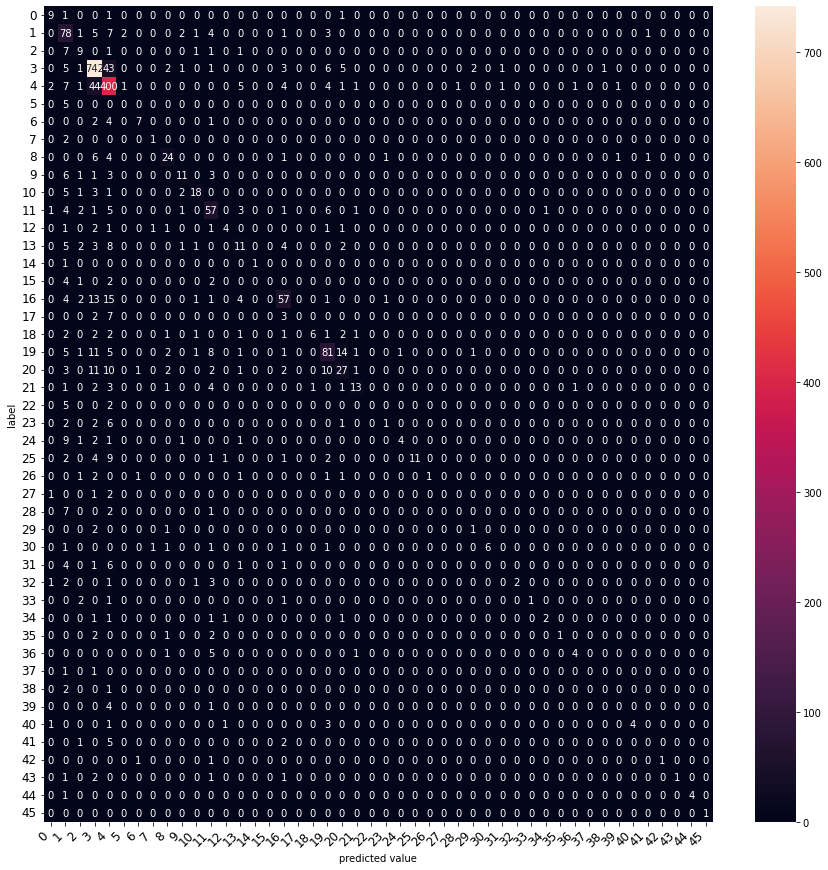

In [107]:
# 랜덤 포레스트
print("[랜덤 포레스트]")
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[랜덤 포레스트의 Classification Report]")
print(classification_report(y_test, forest.predict(tfidfv_test)))
print("\n")
print("[랜덤 포레스트의 Confusion Matrix]")
graph_confusion_matrix(forest, tfidfv_test, y_test)

[그래디언트 부스팅 트리]
정확도: 0.7328584149599288


[그래디언트 부스팅 트리의 Classification Report]


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.73      0.67      0.70        12
           1       0.75      0.62      0.68       105
           2       0.36      0.40      0.38        20
           3       0.86      0.92      0.89       813
           4       0.76      0.84      0.79       474
           5       0.00      0.00      0.00         5
           6       0.92      0.79      0.85        14
           7       0.50      0.33      0.40         3
           8       0.58      0.66      0.62        38
           9       0.79      0.76      0.78        25
          10       0.81      0.83      0.82        30
          11       0.59      0.66      0.62        83
          12       0.43      0.23      0.30        13
          13       0.46      0.49      0.47        37
          14       0.25      1.00      0.40         2
          15       0.50      0.22      0.31         9
          16       0.63      0.65      0.64        99
          17       0.45    

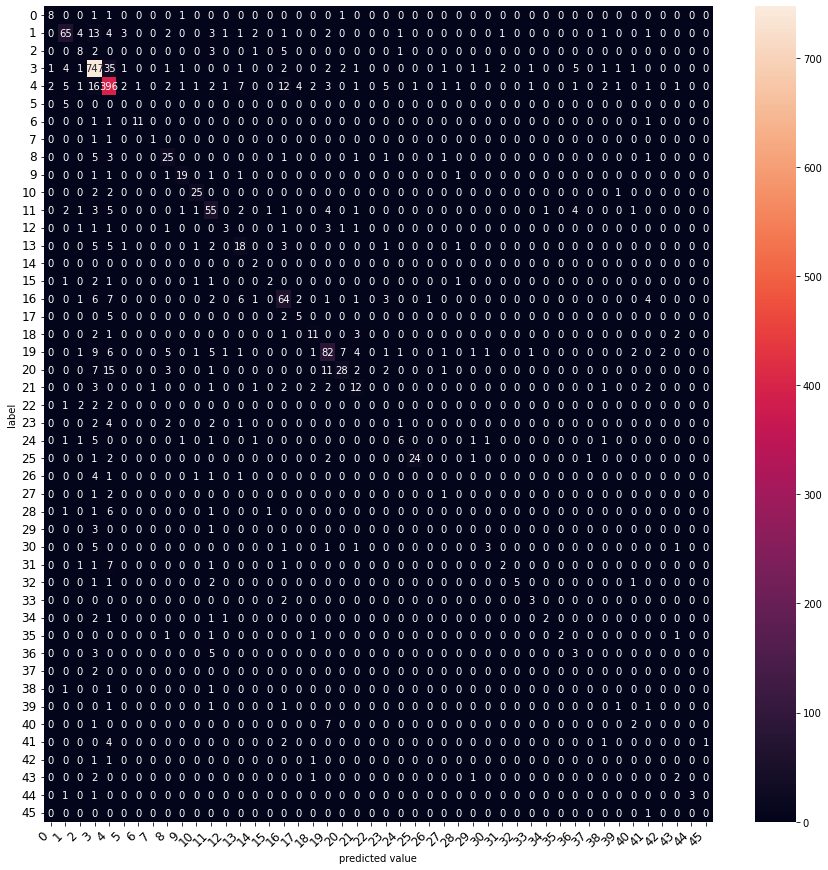

In [108]:
# 그래디언트 부스팅 트리
print("[그래디언트 부스팅 트리]")
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)

predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[그래디언트 부스팅 트리의 Classification Report]")
print(classification_report(y_test, grbt.predict(tfidfv_test)))
print("\n")
print("[그래디언트 부스팅 트리의 Confusion Matrix]")
graph_confusion_matrix(grbt, tfidfv_test, y_test)

[보팅]


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


정확도: 0.773820124666073


[보팅의 Classification Report]


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.68      0.72      0.70       105
           2       0.65      0.55      0.59        20
           3       0.91      0.94      0.93       813
           4       0.79      0.86      0.82       474
           5       0.00      0.00      0.00         5
           6       0.92      0.86      0.89        14
           7       0.50      0.33      0.40         3
           8       0.63      0.71      0.67        38
           9       0.79      0.76      0.78        25
          10       0.83      0.83      0.83        30
          11       0.59      0.70      0.64        83
          12       0.67      0.46      0.55        13
          13       0.55      0.62      0.58        37
          14       0.33      1.00      0.50         2
          15       0.40      0.22      0.29         9
          16       0.67      0.67      0.67        99
          17       0.64    

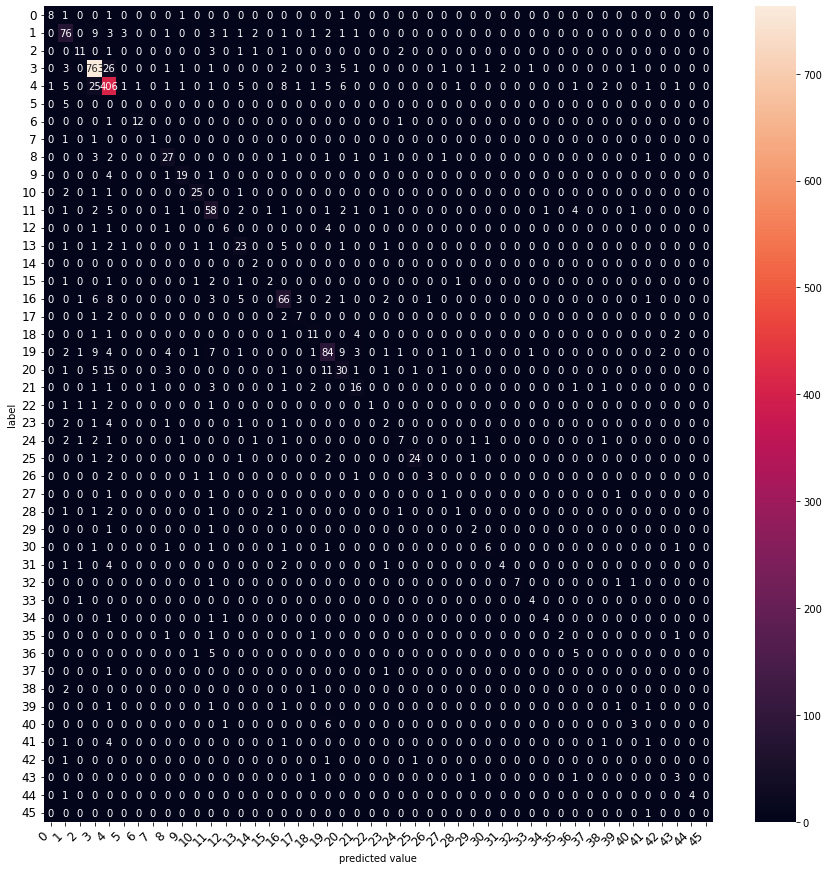

In [109]:
# 보팅
print("[보팅]")
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)

predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[보팅의 Classification Report]")
print(classification_report(y_test, voting_classifier.predict(tfidfv_test)))
print("\n")
print("[보팅의 Confusion Matrix]")
graph_confusion_matrix(voting_classifier, tfidfv_test, y_test)

--------------------------
## 결과
--------------------------

||모든 단어|5000|10000|20000|15000|1000
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|나이브 베이즈 분류기|0.66|0.60|0.68|0.62|0.64|0.70|
|CNB|0.77|0.76|0.77|0.77|0.77|0.73|
|로지스틱 회귀|0.80|0.81|0.80|0.81|0.81|0.76|
|서포트 벡터 머신|0.77|0.77|0.77|0.77|0.77|0.72|
|결정 트리|0.62|0.62|0.62|0.62|0.62|0.61|
|랜덤 포레스트|0.68|0.66|0.70|0.66|0.68|0.71|
|그래디언트 부스팅 트리|0.76|0.76|<span style="color:red">0.00</span>|0.76|0.77|0.73|
|보팅|0.80|0.82|0.70|0.81|0.81|0.78|

가장 잘 나온 모델은 로지스틱회귀이고 모든 모델들이 가장 높은 성과를 거둔 것은 단어의 갯수가 1만개 일 때이다.
> 그래디언트 부스팅 트리에서 단어가 5천개일 때 0.0013357079252003562라는 정확도가 나왔는데 이유가 뭔지 궁금하다

## 4. 딥러닝 모델과 비교하기

In [110]:
# RNN에 필요한 라이브러리 import
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [111]:
# 데이터 불러오기
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)

# 훈련과 시험 샘플 수 확인
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('시험 샘플의 수: {}'.format(len(x_test)))

# 정수 시퀀스 원래 뉴스 텍스트 데이터로 복원하기
word_index = reuters.get_word_index(path="reuters_word_index.json")

# 복원된 단어를 인덱스로 어떤 정수와 맵핑되는지 확인하기
print(word_index['the'])
print(word_index['it'])

# 실제 단어에 맵핑한 정수에 -3을 한 정수를 입력해서 각 정수에 +3하고 확인하기
index_to_word = {index + 3 : word for word, index in word_index.items()}
print(index_to_word[4]) # the
print(index_to_word[16]) # it

# index_to_word에 숫자 0은 , 숫자 1은 , 숫자 2는 를 넣어주기
for index, token in enumerate(("", "", "")):
    index_to_word[index]=token
    
# index_to_word로 첫번째 훈련용 기사 원래 텍스트로 복원하기
print(' '.join([index_to_word[index] for index in x_train[0]]))

decoded= []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded

decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded

# DTM, TF-IDF 행렬로 벡터화하기
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

훈련 샘플의 수: 8982
시험 샘플의 수: 2246
1
13
the
it
   said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
(8982, 9668)
(8982, 9668)


In [112]:
import scipy
tfidfv = scipy.sparse.csr_matrix.toarray(tfidfv)

print(tfidfv)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.08687359 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.09300711 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [113]:
y_train = to_categorical(y_train) # 훈련용 뉴스 기사 레이블의 원-핫 인코딩
y_test = to_categorical(y_test) # 테스트용 뉴스 기사 레이블의 원-핫 인코딩

In [114]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(1000, 120)) 
model.add(SimpleRNN(120)) 
model.add(Dense(46, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 120)         120000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 120)               28920     
_________________________________________________________________
dense (Dense)                (None, 46)                5566      
Total params: 154,486
Trainable params: 154,486
Non-trainable params: 0
_________________________________________________________________


In [115]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(tfidfv, y_train, epochs = 1)

281/281 [==============================] - 3932s 14s/step - loss: 0.1011 - accuracy: 0.3254


In [116]:
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

tfidfv_test = scipy.sparse.csr_matrix.toarray(tfidfv_test)

predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측
predicted = (predicted > 0.5) 

print("- 정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[RNN의 Classification Report]")
print(classification_report(y_test, predicted))

- 정확도: 0.0


[RNN의 Classification Report]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00       105
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00       813
           4       0.00      0.00      0.00       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00        25
          10       0.00      0.00      0.00        30
          11       0.00      0.00      0.00        83
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.00      0.00      

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
